In [1]:
import numpy as np
import xgboost as xgb
import matplotlib.pyplot as plt
import os
from numba_stats import expon # crystalball,crystalball_ex, norm, expon, voigt, truncexpon

os.environ["HOMELUDO"] = '/home/submit/mori25/'
os.environ["DPUSER"] = '/work/submit/mori25/Darkphotons_ludo/'

from training_offline import Trainer, plot_ROC,plot_ROC_train_test 

Start by looking at the performance of a few differend BDTs on Y data. First evaluate them on the Y data and then plot the ROC. 

Start loading data
Successfully imported data file /data/submit/mori25/dark_photons_ludo/DimuonTrees/offline/Y/merged_A_bkp.root to memory
Start loading MC data
Successfully imported data file /data/submit/mori25/dark_photons_ludo/DimuonTrees/MC_InclusiveMinBias/Y/merged_A.root to memory
Defined training and evaluation datasets

loading model  /work/submit/mori25/Darkphotons_ludo/BDT/trained_models/forest_standard_Y.json
loading successful


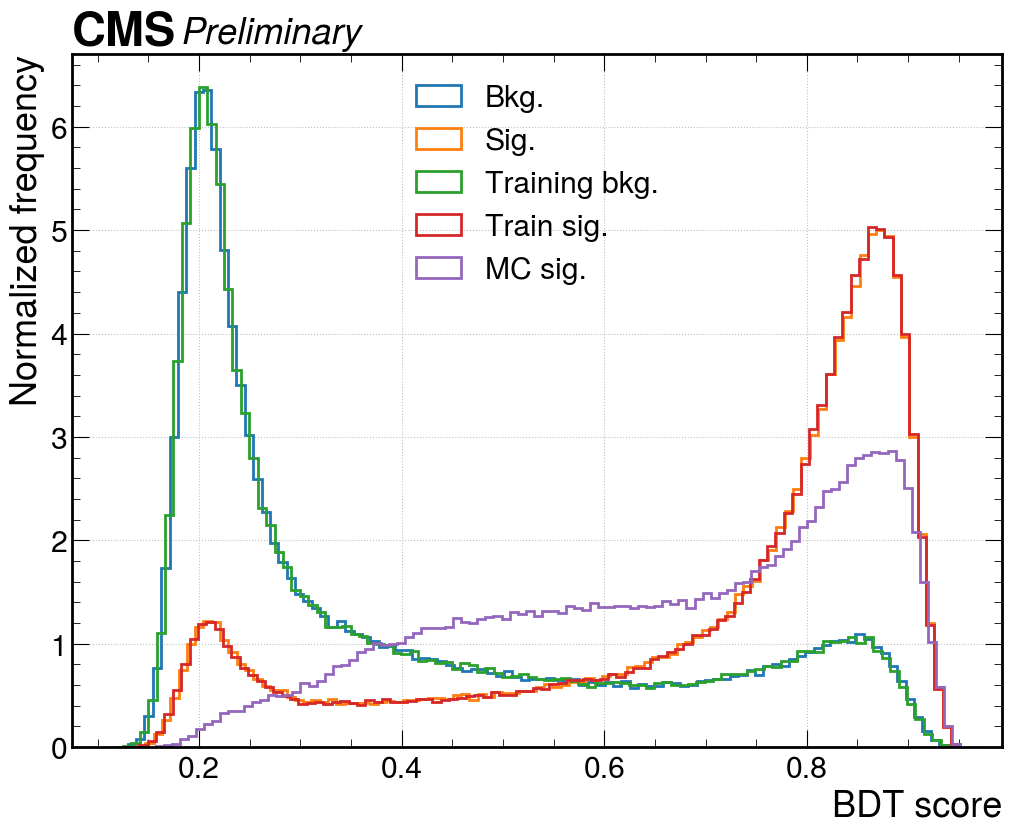

In [2]:
Y_forest = Trainer("Y", 'forest_standard')
Y_forest.complete_load(include_MC=True)
Y_forest.plot_model(plot_training=True,plot_MC=True)

Start loading data


Successfully imported data file /data/submit/mori25/dark_photons_ludo/DimuonTrees/offline/Y/merged_A_bkp.root to memory
Start loading MC data
Successfully imported data file /data/submit/mori25/dark_photons_ludo/DimuonTrees/MCRun3/Y/merged_A.root to memory
Defined training and evaluation datasets

loading model  /work/submit/mori25/Darkphotons_ludo/BDT/trained_models/tree_standard_Y.json
loading successful


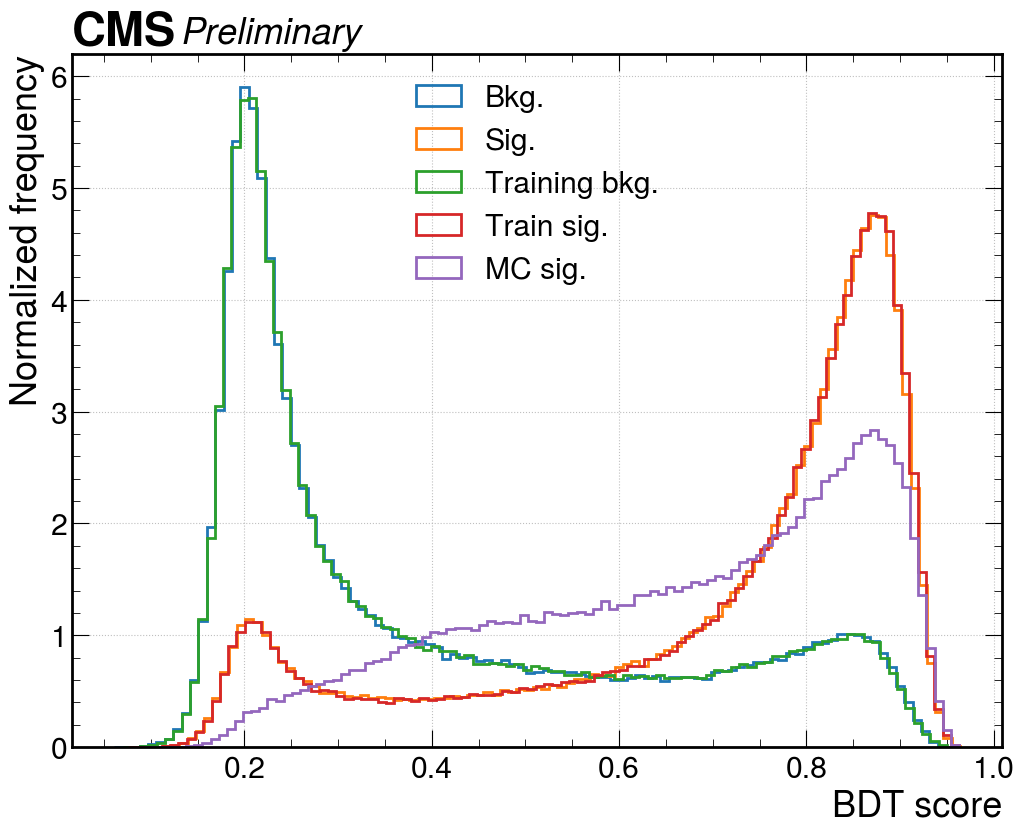

In [ ]:
Y_tree = Trainer("Y", 'tree_standard')
Y_tree.complete_load(include_MC=True)
Y_tree.plot_model(plot_training=True,plot_MC=True)

In the next one we include the MuonID in the training sample. No significant improvements are noticeable in the ROCs. 

Start loading data


Successfully imported data file /data/submit/mori25/dark_photons_ludo/DimuonTrees/offline/Y/merged_A_bkp.root to memory
Defined training and evaluation datasets

loading model  /work/submit/mori25/Darkphotons_ludo/BDT/trained_models/forest_ID_Y.json
loading successful


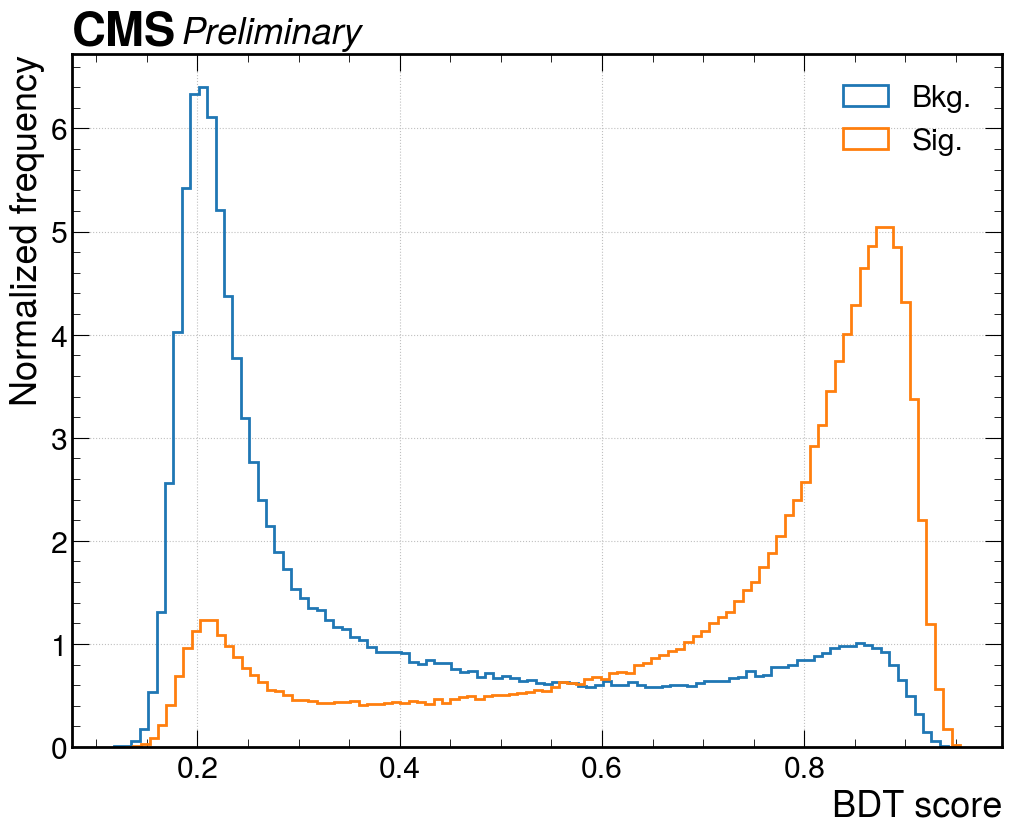

In [ ]:
# Y_forest_ID = Trainer("Y", 'forest_ID')
# Y_forest_ID.complete_load()
# Y_forest_ID.plot_model()

Start loading data


Successfully imported data file /data/submit/mori25/dark_photons_ludo/DimuonTrees/offline/Y/merged_A_bkp.root to memory
Start loading MC data
Successfully imported data file /data/submit/mori25/dark_photons_ludo/DimuonTrees/MCRun3/Y/merged_A.root to memory
Defined training and evaluation datasets

loading model  /work/submit/mori25/Darkphotons_ludo/BDT/trained_models/forest_standard_Jpsi.json
loading successful


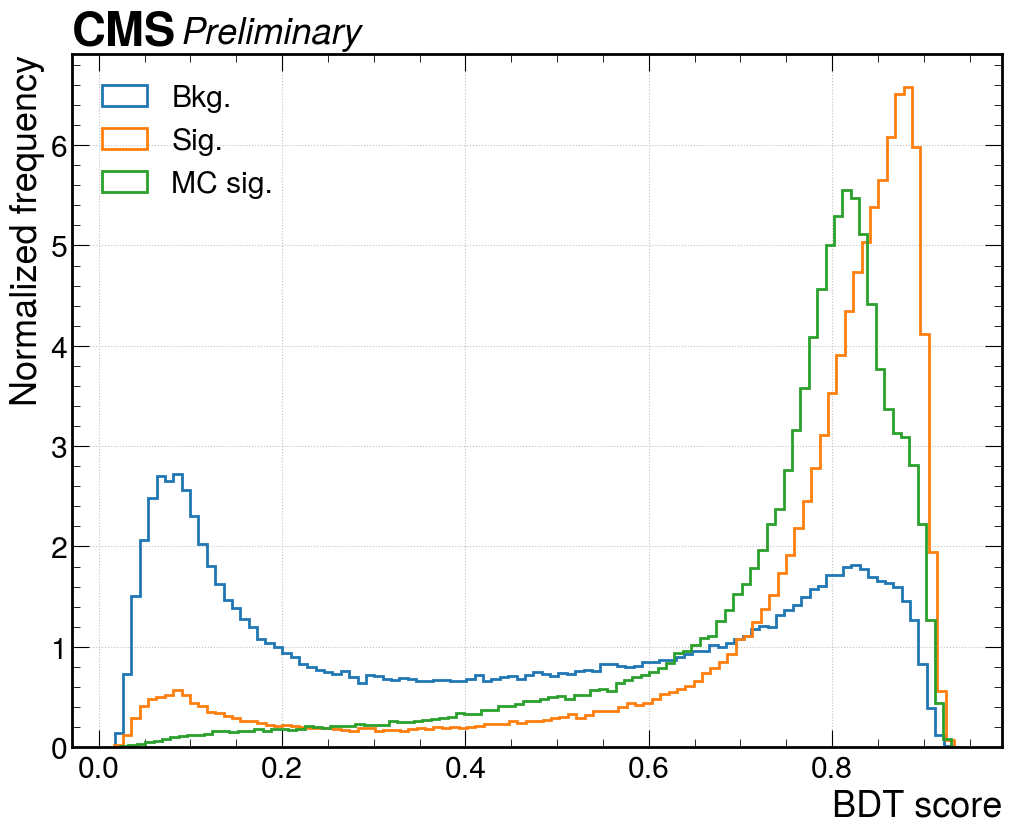

In [ ]:
Jpsi_forest_on_Y = Trainer("Jpsi", 'forest_standard') #Trainer object accessing model trained on Jpsi data
Jpsi_forest_on_Y.complete_load("Y",include_MC=True) #Load Y data for evaluation
Jpsi_forest_on_Y.plot_model(plot_MC=True)
# Jpsi_forest_on_Y.plot_mass(plot_MC=True, apply_weights=False)

Start loading data


Successfully imported data file /data/submit/mori25/dark_photons_ludo/DimuonTrees/offline/Y/merged_A_bkp.root to memory
Start loading MC data
Successfully imported data file /data/submit/mori25/dark_photons_ludo/DimuonTrees/MCRun3/Y/merged_A.root to memory
Defined training and evaluation datasets

loading model  /work/submit/mori25/Darkphotons_ludo/BDT/trained_models/forest_prompt_Jpsi.json
loading successful


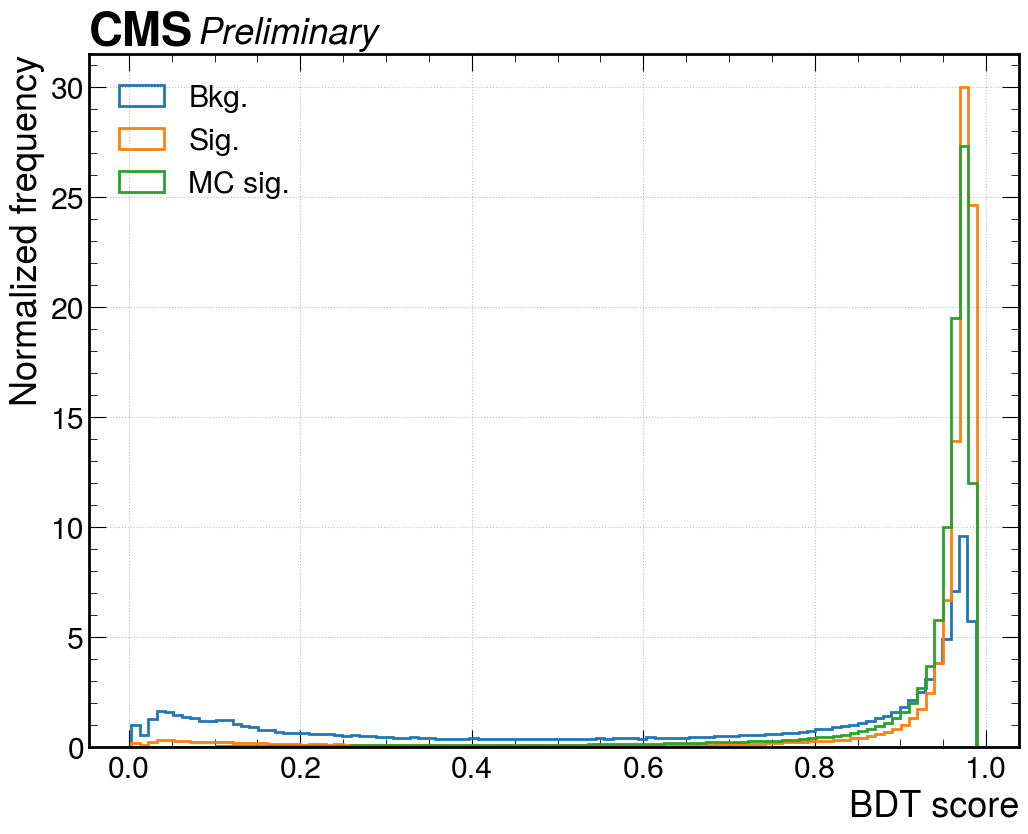

In [ ]:
Jpsi_forest_on_Y_prompt = Trainer("Jpsi", 'forest_prompt') #Trainer object accessing model trained on Jpsi
Jpsi_forest_on_Y_prompt.complete_load("Y", include_MC=True,name_extra="_w=0.1825") #Load Y data for evaluation
Jpsi_forest_on_Y_prompt.plot_model(plot_MC=True)

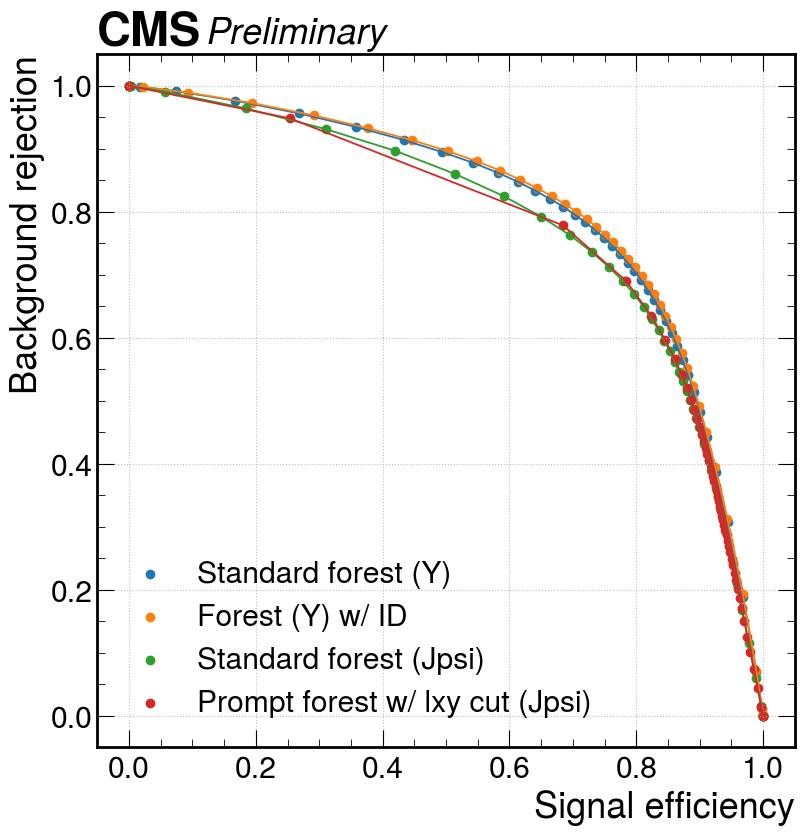

In [ ]:
# plot_ROC_train_test([Y_forest,Y_forest_ID], ["Boosted RF", "Boosted RF w/ ID"], n_points=20)
plot_ROC([Y_forest,Y_forest_ID,Jpsi_forest_on_Y,Jpsi_forest_on_Y_prompt], 
         ["Standard forest (Y)", "Forest (Y) w/ ID","Standard forest (Jpsi)", "Prompt forest w/ lxy cut (Jpsi)"],
         [Y_forest.dval,Y_forest_ID.dval,Jpsi_forest_on_Y.dval,Jpsi_forest_on_Y_prompt.dval],n_points=50)

From now on, consider the networks operating on the Jpsi data.

Now consider a special case: the Y-trained random forest evaluated on the Jpsi meson data. After computing the sPlots and unfolding signal and background, we will be able to apply corrections "ex post". However, here, we can still apply corrections based on the tail fit in the l_{xy} distribution, and define signal and background through the same cuts as in training (to be found in the config). We see how the prompt reweighing improves greatly the outcome.

Start loading data


Successfully imported data file /data/submit/mori25/dark_photons_ludo/DimuonTrees/offline/Jpsi/merged_A_bkp.root to memory
Defined training and evaluation datasets

loading model  /work/submit/mori25/Darkphotons_ludo/BDT/trained_models/forest_standard_Y.json
loading successful


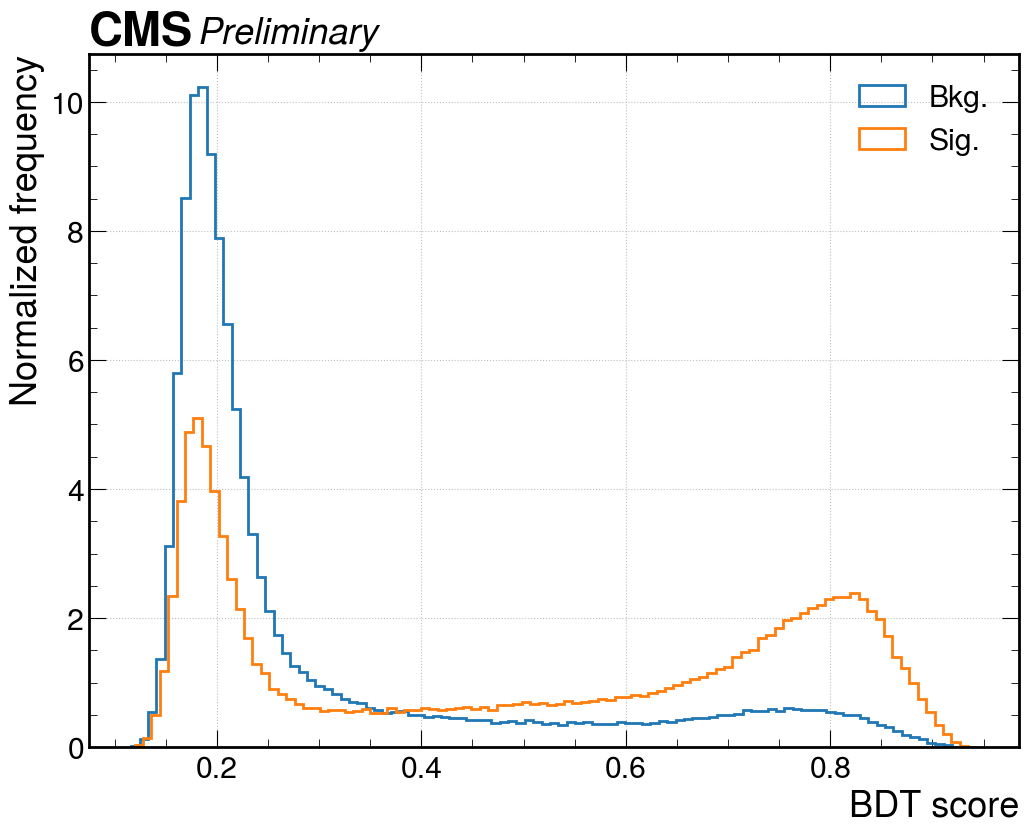

In [ ]:
Y_forest_on_Jpsi = Trainer("Y", 'forest_standard') #Trainer object accessing model trained on Y data
Y_forest_on_Jpsi.complete_load("Jpsi") #Load Jpsi data for evaluation
Y_forest_on_Jpsi.plot_model(apply_weights=False)

In [ ]:
def nonPrompt_tail(x,N,b):
    return  N*expon.pdf(x,0,b)

Start loading data
Successfully imported data file /data/submit/mori25/dark_photons_ludo/DimuonTrees/offline/Jpsi/merged_A_bkp.root to memory
Start loading MC data


Successfully imported data file /data/submit/mori25/dark_photons_ludo/DimuonTrees/MCRun3/Jpsi/merged_A.root to memory
Start fitting function  <function nonPrompt_tail at 0x7f7e58da8e00> to variable  Mm_kin_lxy
Done fitting. Parameters:  17977.449229564176 0.16988146347672736


/work/submit/mori25/Darkphotons_ludo/BDT/training_offline.py:231: RuntimeWarning: divide by zero encountered in divide
  weight_hist = np.where(histSlxy==0,0, (histSlxy-fitting_func(x_corr,*mData.values)/dx_fit*dx_corr)/histSlxy)



Some General infos:

                Total number of events considered: 2703166 

                Sum of weights: 1495529.2083434337 

                Fitted prompt: 1567823.1079264213

                Sum of weights>0 1503098.0299017515




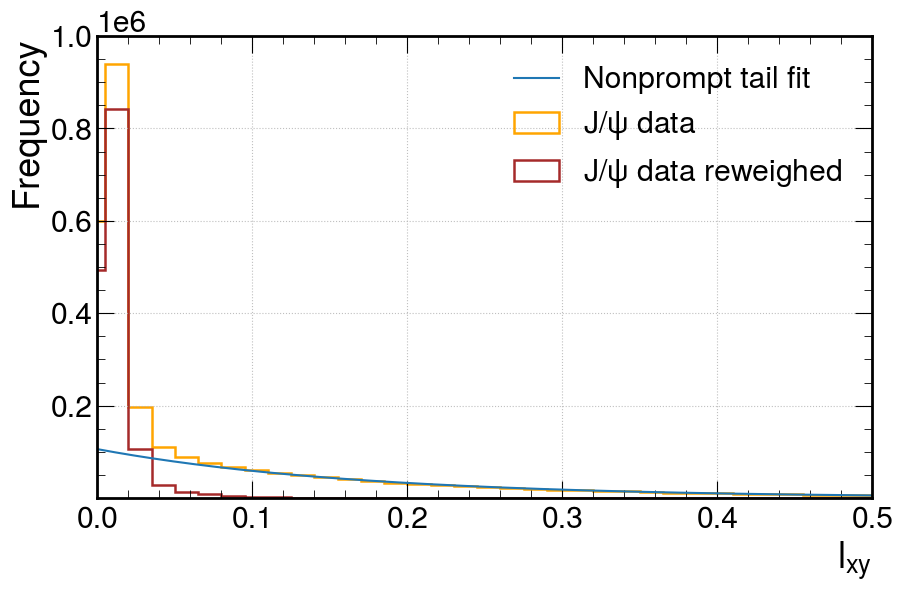

Total signal events: 332272
 Total signal weight: 200798.521487867, 0.86 of total weight
Defined training and evaluation datasets

loading model  /work/submit/mori25/Darkphotons_ludo/BDT/trained_models/forest_standard_Y.json
loading successful


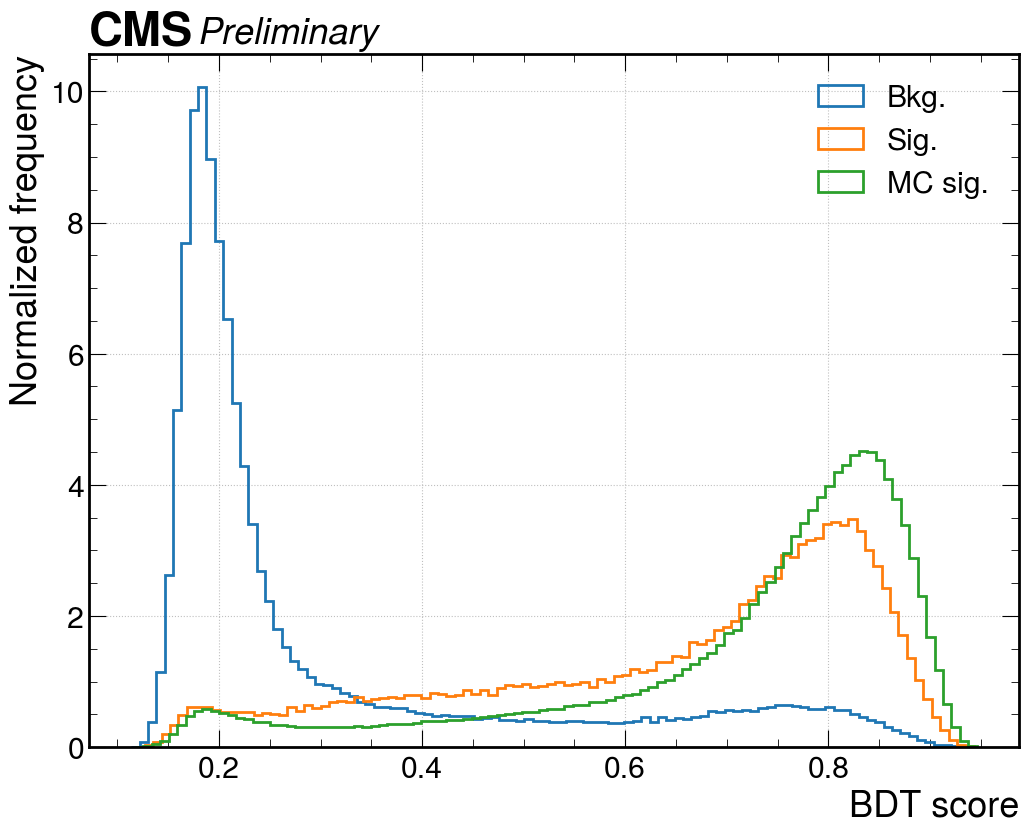

In [ ]:
"""
Y-trained, evaluated on Jpsi dataset (ie like just above), however this time we apply a reweighing to the output signal (and to the MC)
"""

modelname = "forest_standard"
Y_forest_on_Jpsi_corr = Trainer("Y", modelname)
Y_forest_on_Jpsi_corr.load_data("Jpsi", include_MC=True)

#import reweighing parameters
lxy_cutoff = Y_forest_on_Jpsi_corr.particle_config["models"][modelname]["reweighing"]["lxy_cutoff"]
nbins_fit = Y_forest_on_Jpsi_corr.particle_config["models"][modelname]["reweighing"]["nbins_fit"]
nbins_corrections = Y_forest_on_Jpsi_corr.particle_config["models"][modelname]["reweighing"]["nbins_corrections"]

#Define data and compute weights
data_prompt = Y_forest_on_Jpsi_corr.full_mass_range[Y_forest_on_Jpsi_corr.full_mass_range["Mm_kin_lxy"]<lxy_cutoff]
weights_forest_standard = Y_forest_on_Jpsi_corr.compute_reweight(data_prompt,'Mm_kin_lxy', nonPrompt_tail,nbins_fit=nbins_fit,nbins_corrections=nbins_corrections,fit_range=(0.1,0.5),fitting_limits=[(0,1)],plot=True, xrange=(0,0.5))
weights_forest_standard = np.where(weights_forest_standard<0, 0, weights_forest_standard)

#Perform training and plot
Y_forest_on_Jpsi_corr.prepare_training_set(data_particle="Jpsi",data_override=data_prompt, weights=weights_forest_standard)
Y_forest_on_Jpsi_corr.load_model()
Y_forest_on_Jpsi_corr.plot_model(apply_weights=True,density=True, plot_MC=True)

Start loading data


Successfully imported data file /data/submit/mori25/dark_photons_ludo/DimuonTrees/offline/Jpsi/merged_A_bkp.root to memory
Start loading MC data
Successfully imported data file /data/submit/mori25/dark_photons_ludo/DimuonTrees/MCRun3/Jpsi/merged_A.root to memory
Defined training and evaluation datasets

loading model  /work/submit/mori25/Darkphotons_ludo/BDT/trained_models/forest_standard_Jpsi.json
loading successful


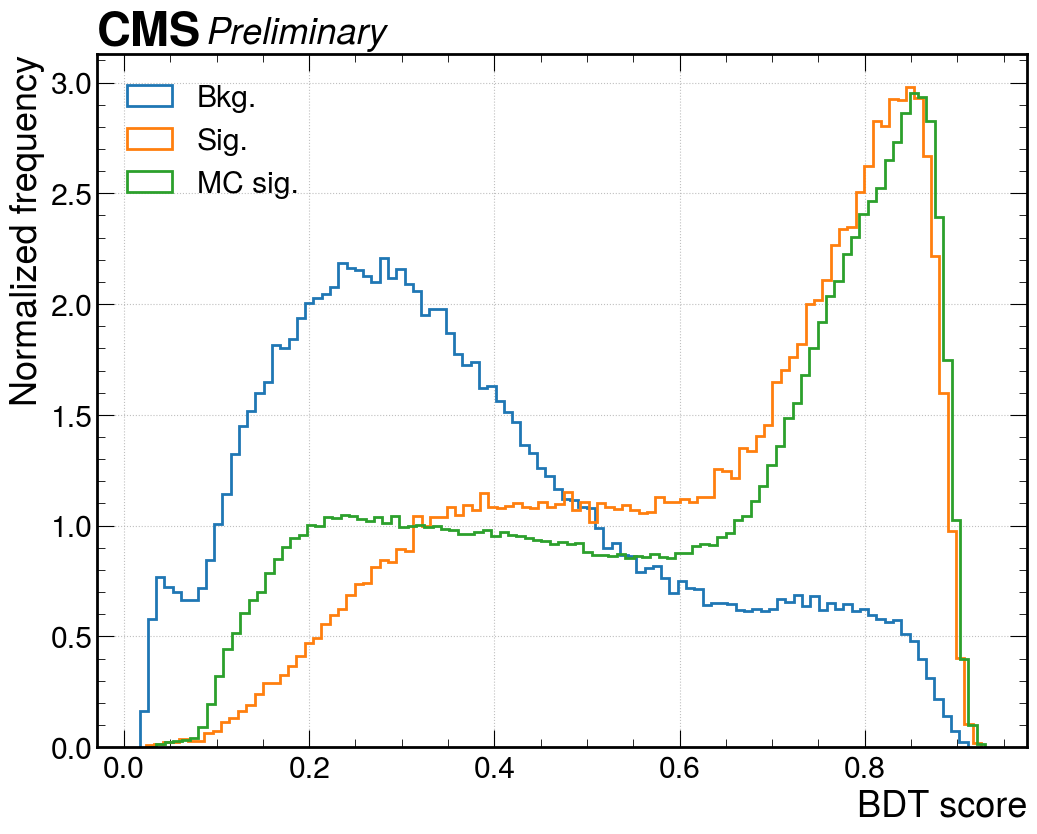

In [ ]:
modelname = "forest_standard"
Jpsi_fs = Trainer("Jpsi", modelname)
Jpsi_fs.load_data(include_MC=True)
Jpsi_fs.prepare_training_set(w_frac_bkg=1)
Jpsi_fs.load_model()
Jpsi_fs.plot_model(plot_MC=True)

Start loading data
Successfully imported data file /data/submit/mori25/dark_photons_ludo/DimuonTrees/offline/Jpsi/merged_A_bkp.root to memory
Start loading MC data
Successfully imported data file /data/submit/mori25/dark_photons_ludo/DimuonTrees/MCRun3/Jpsi/merged_A.root to memory
Start fitting function  <function nonPrompt_tail at 0x7f7e58da8e00> to variable  Mm_kin_lxy
Done fitting. Parameters:  17977.449229564176 0.16988146347672736


/work/submit/mori25/Darkphotons_ludo/BDT/training_offline.py:231: RuntimeWarning: divide by zero encountered in divide
  weight_hist = np.where(histSlxy==0,0, (histSlxy-fitting_func(x_corr,*mData.values)/dx_fit*dx_corr)/histSlxy)



Some General infos:

                Total number of events considered: 2703166 

                Sum of weights: 1495529.2083434337 

                Fitted prompt: 1567823.1079264213

                Sum of weights>0 1503098.0299017515




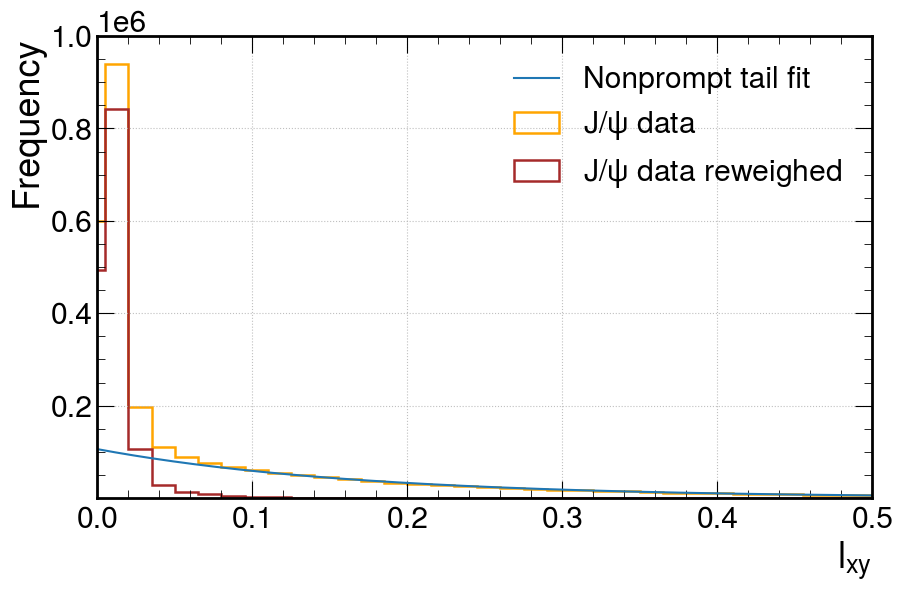

Total signal events: 332272
 Total signal weight: 200798.521487867, 0.06 of total weight
Defined training and evaluation datasets

loading model  /work/submit/mori25/Darkphotons_ludo/BDT/trained_models/forest_prompt_Jpsi.json


loading successful


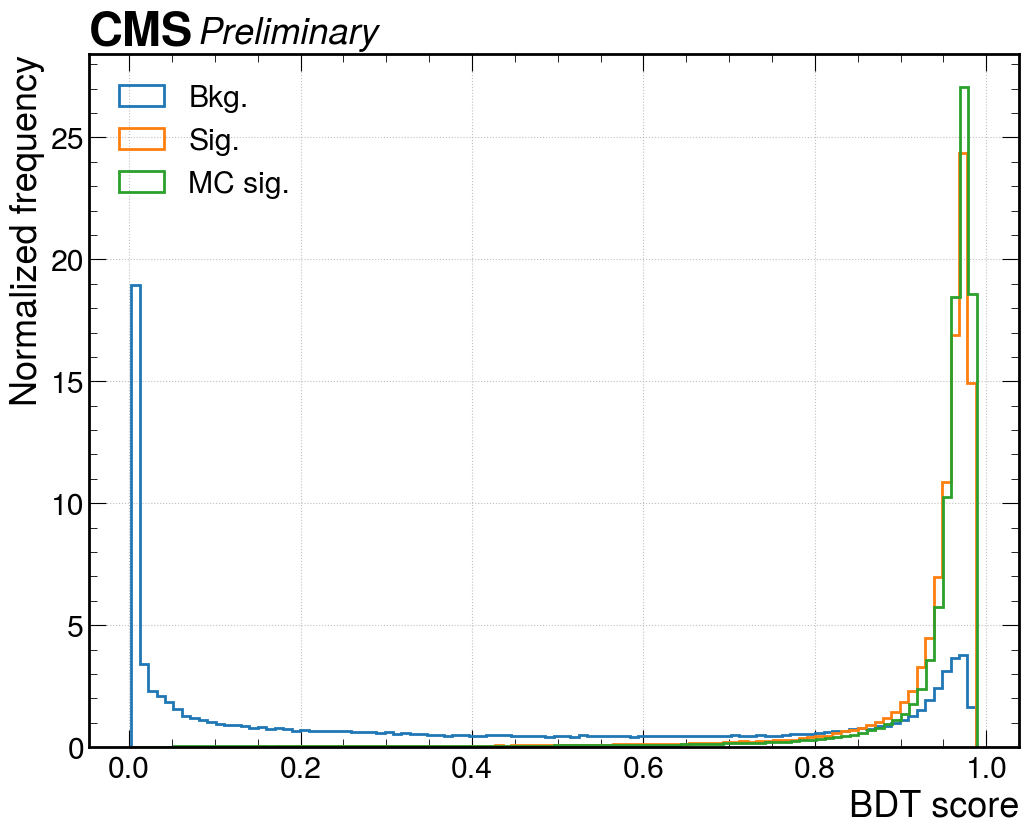

In [ ]:
modelname = "forest_prompt"
Jpsi_fp = Trainer("Jpsi", modelname)
Jpsi_fp.load_data(include_MC=True)

#import reweighing parameters
lxy_cutoff = Jpsi_fp.particle_config["models"][modelname]["reweighing"]["lxy_cutoff"]
nbins_fit = Jpsi_fp.particle_config["models"][modelname]["reweighing"]["nbins_fit"]
nbins_corrections = Jpsi_fp.particle_config["models"][modelname]["reweighing"]["nbins_corrections"]

#Define data and compute weights
data_prompt = Jpsi_fp.full_mass_range[Jpsi_fp.full_mass_range["Mm_kin_lxy"]<lxy_cutoff]
weights_fp = Jpsi_fp.compute_reweight(data_prompt,'Mm_kin_lxy', nonPrompt_tail,nbins_fit=nbins_fit,nbins_corrections=nbins_corrections,fit_range=(0.1,0.5),fitting_limits=[(0,1)],plot=True, xrange = (0,0.5))
weights_fp = np.where(weights_fp<0, 0, weights_fp)

#Perform training and plot
Jpsi_fp.prepare_training_set(data_override=data_prompt, weights=weights_fp,w_frac_bkg=10)
Jpsi_fp.load_model()
Jpsi_fp.plot_model(apply_weights=True,plot_MC=True,density=True)

In [ ]:
modelname = "forest_prompt_noPromptCut"
Jpsi_fp_nPC = Trainer("Jpsi", modelname)
Jpsi_fp_nPC.load_data()

#import reweighing parameters
lxy_cutoff = Jpsi_fp_nPC.particle_config["models"][modelname]["reweighing"]["lxy_cutoff"]
nbins_fit = Jpsi_fp_nPC.particle_config["models"][modelname]["reweighing"]["nbins_fit"]
nbins_corrections = Jpsi_fp_nPC.particle_config["models"][modelname]["reweighing"]["nbins_corrections"]

#Define data and compute weights
data_prompt = Jpsi_fp_nPC.full_mass_range[Jpsi_fp_nPC.full_mass_range["Mm_kin_lxy"]<lxy_cutoff]
weights_fp_nPC = Jpsi_fp_nPC.compute_reweight(data_prompt,'Mm_kin_lxy', nonPrompt_tail,nbins_fit=nbins_fit,nbins_corrections=nbins_corrections,fit_range=(0.1,0.5),fitting_limits=[(0,1)],plot=False)
weights_fp_nPC = np.where(weights_fp_nPC<0, 0, weights_fp_nPC)

#Perform training and plot
Jpsi_fp_nPC.prepare_training_set(data_override=data_prompt,weights=weights_fp_nPC)
Jpsi_fp_nPC.load_model()
# Jpsi_fp_nPC.plot_model(apply_weights=True)

Start loading data
Successfully imported data file /data/submit/mori25/dark_photons_ludo/DimuonTrees/offline/Jpsi/merged_A_bkp.root to memory
Start fitting function  <function nonPrompt_tail at 0x7f7e58da8e00> to variable  Mm_kin_lxy
Done fitting. Parameters:  13137.520277975435 0.17023496095438692


/work/submit/mori25/Darkphotons_ludo/BDT/training_offline.py:231: RuntimeWarning: divide by zero encountered in divide
  weight_hist = np.where(histSlxy==0,0, (histSlxy-fitting_func(x_corr,*mData.values)/dx_fit*dx_corr)/histSlxy)



Some General infos:

                Total number of events considered: 2803060 

                Sum of weights: 1528489.4652964433 

                Fitted prompt: 1607606.3271338611

                Sum of weights>0 1615146.6315324144


Total signal events: 340767
 Total signal weight: 214989.17412461946, 0.86 of total weight
Defined training and evaluation datasets

loading model  /work/submit/mori25/Darkphotons_ludo/BDT/trained_models/forest_prompt_noPromptCut_Jpsi.json
loading successful


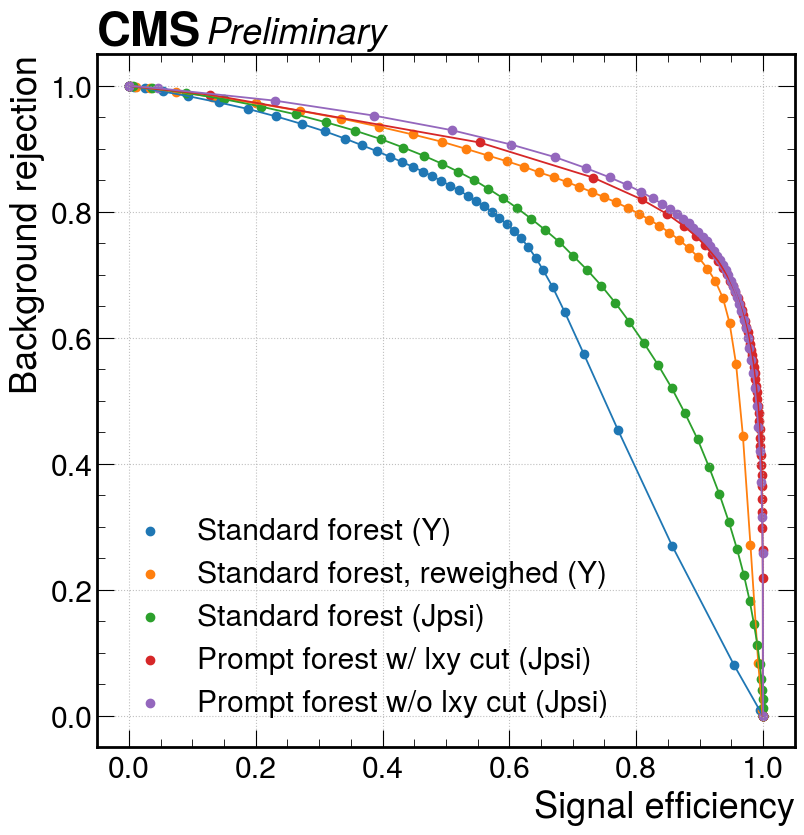

In [ ]:
plot_ROC([Y_forest_on_Jpsi,Y_forest_on_Jpsi_corr, Jpsi_fs,Jpsi_fp,Jpsi_fp_nPC], 
         ["Standard forest (Y)", "Standard forest, reweighed (Y)","Standard forest (Jpsi)", "Prompt forest w/ lxy cut (Jpsi)", "Prompt forest w/o lxy cut (Jpsi)"],
         [Y_forest_on_Jpsi.dval,Y_forest_on_Jpsi_corr.dval,Jpsi_fs.dval,Jpsi_fp.dval,Jpsi_fp_nPC.dval],n_points=50)

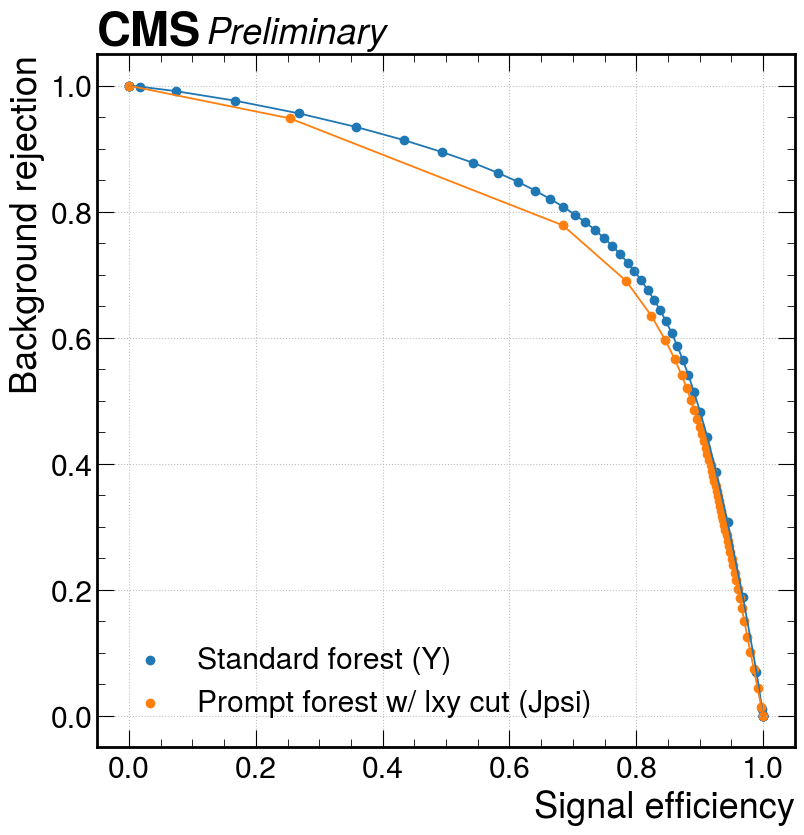

In [ ]:
plot_ROC([Y_forest_on_Jpsi_corr ,Jpsi_fp], 
         [ "Standard forest (Y)","Prompt forest w/ lxy cut (Jpsi)"],
         [Y_forest.dval,Y_forest.dval],n_points=50)

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

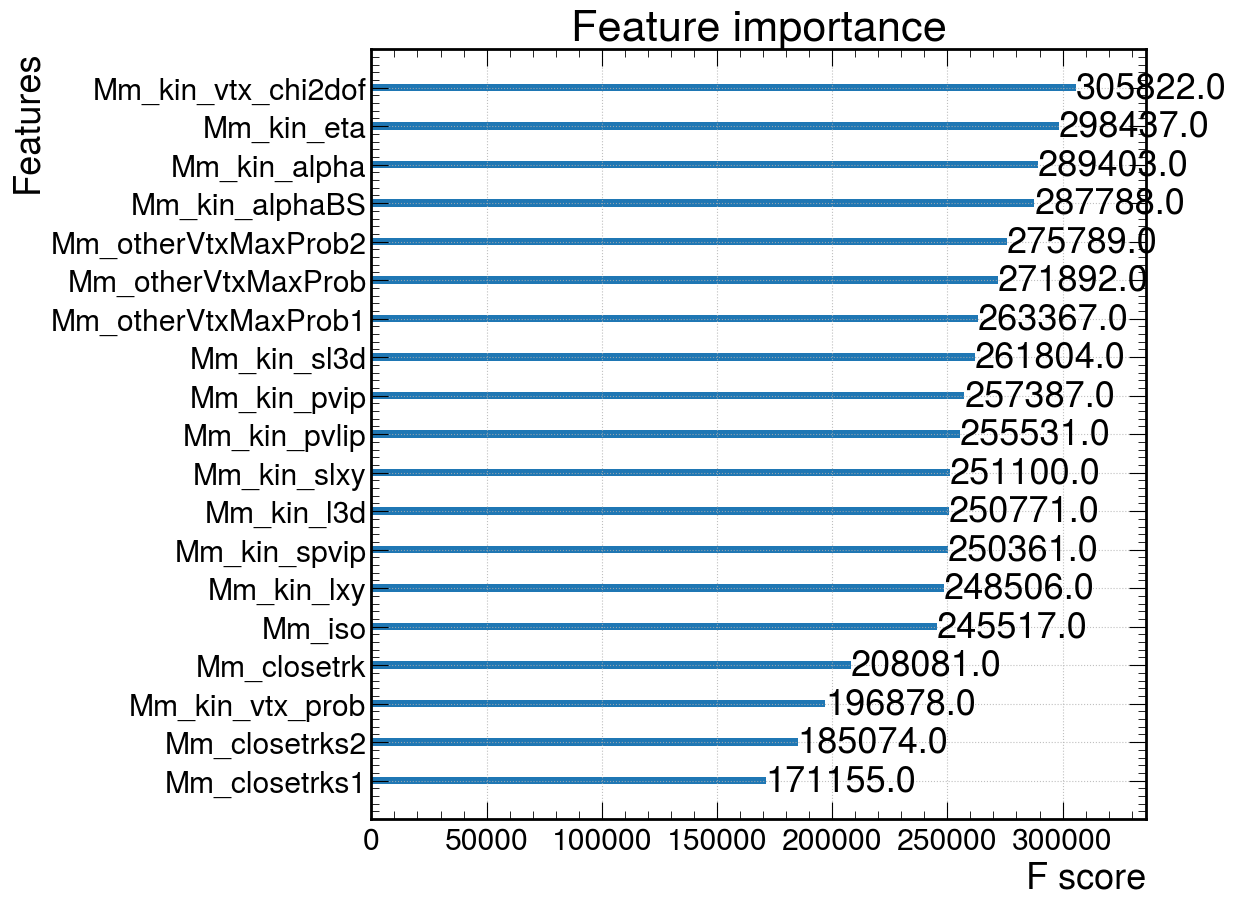

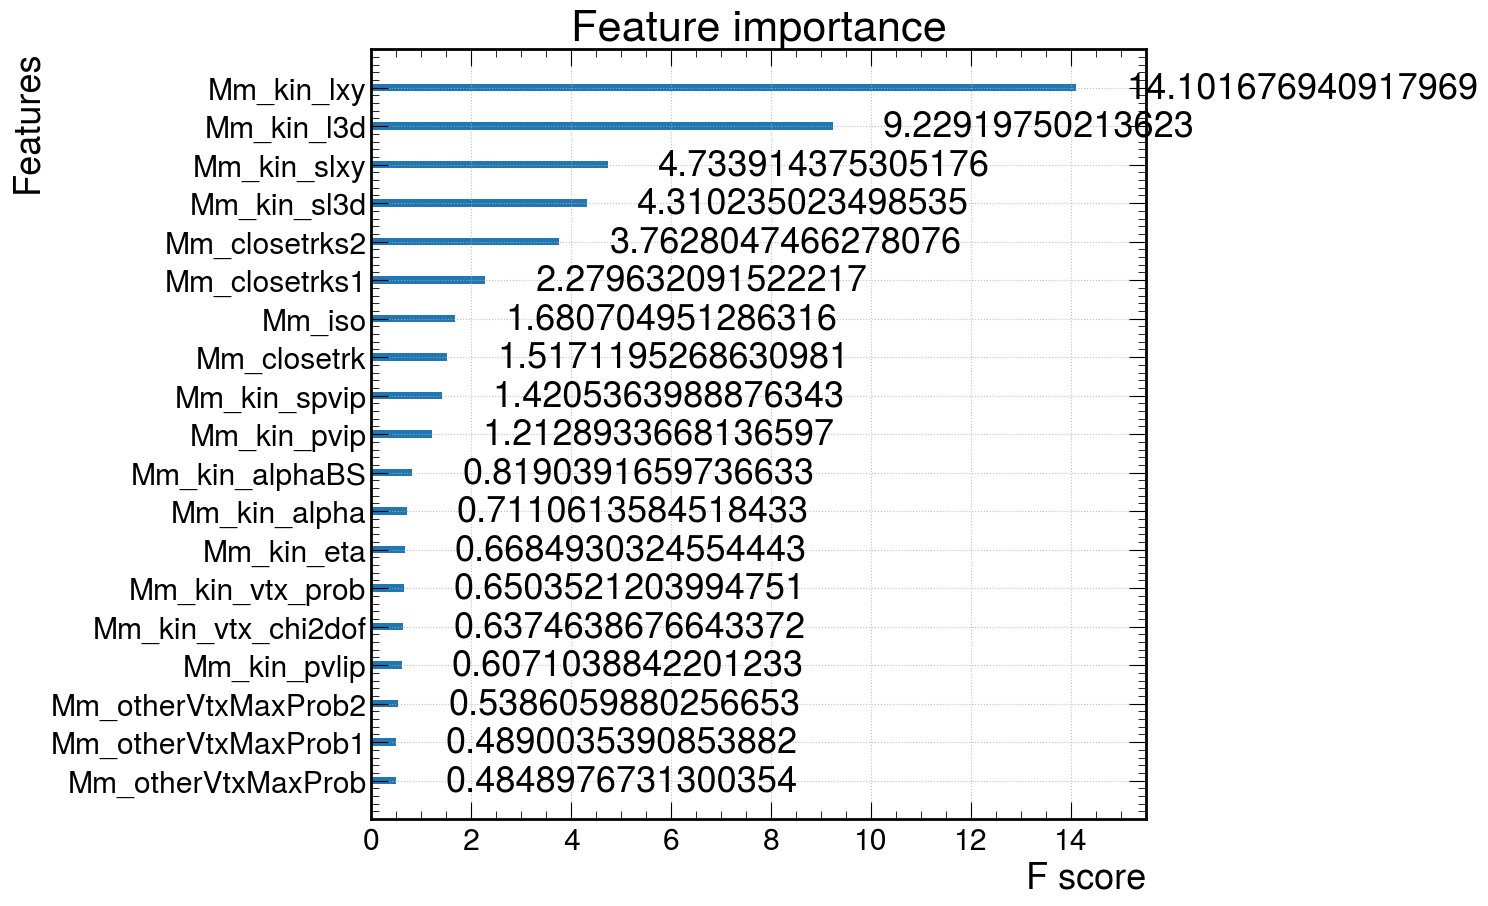

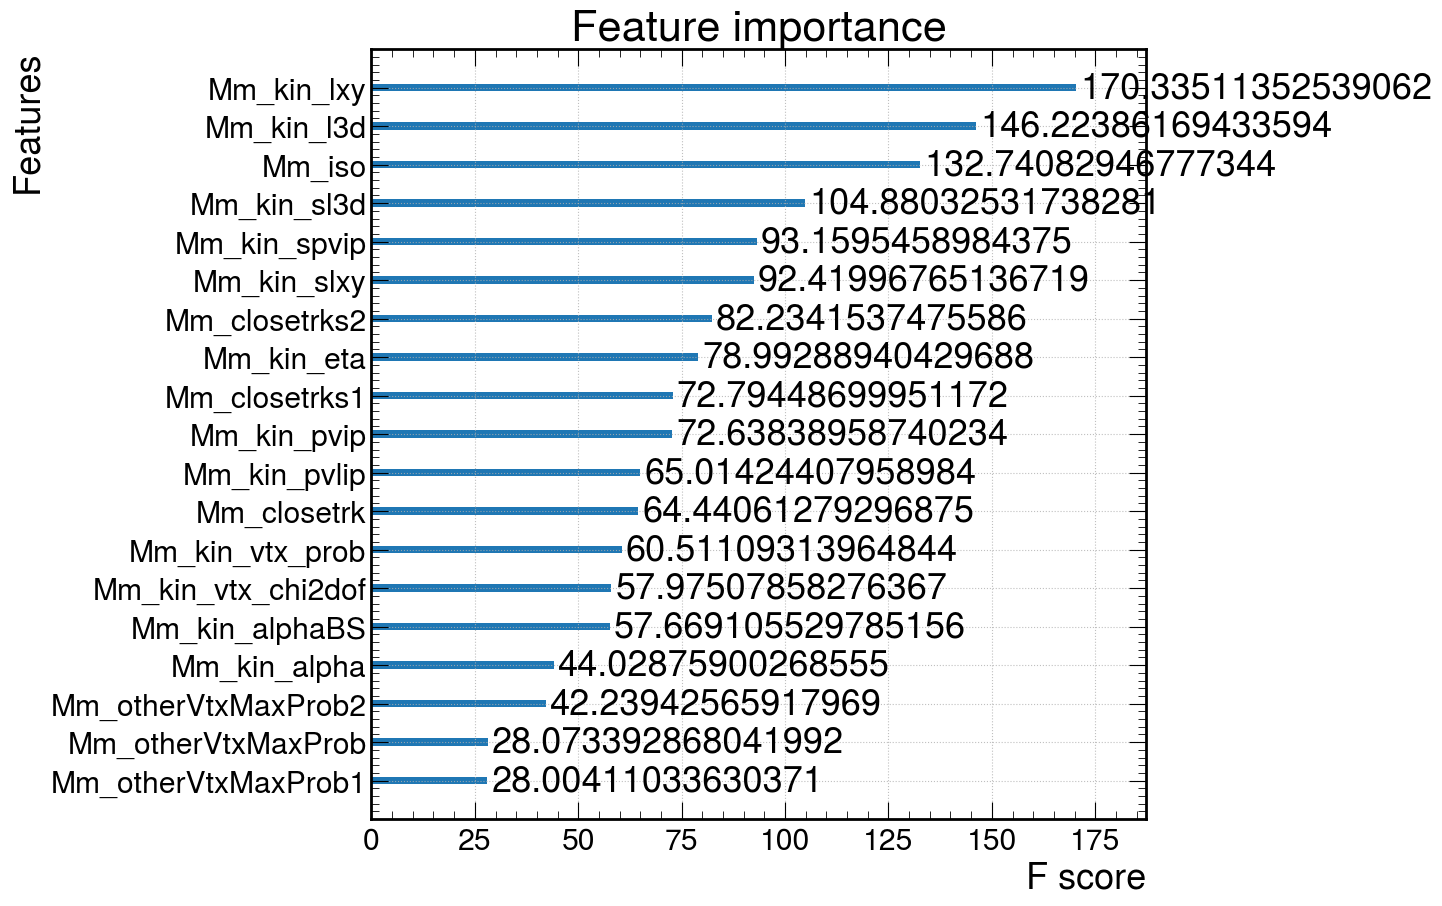

In [ ]:
# xgb.plot_tree(Jpsi_fp.bst)
xgb.plot_importance(Jpsi_fp.bst, importance_type='weight')
xgb.plot_importance(Jpsi_fp.bst, importance_type='gain')
xgb.plot_importance(Jpsi_fp.bst, importance_type='cover')

In [ ]:
print(len(Jpsi_fp.full_mass_range["Mm_kin_lxy"]), len(weights_fp))
print(len(Jpsi_fp_nPC.full_mass_range), len(weights_fp_nPC))

2703166 2703166
2803060 2803060


In [ ]:
# Jpsi_fp_nPC.plot_hist([Jpsi_fp_nPC.X_val["Mm_kin_lxy"][Jpsi_fp_nPC.y_val==1],
#                        Jpsi_fp_nPC.X_val["Mm_kin_lxy"][Jpsi_fp_nPC.y_val==0],
#                        Jpsi_fs.X_val["Mm_kin_lxy"][Jpsi_fs.y_val==1],
#                        Jpsi_fs.X_val["Mm_kin_lxy"][Jpsi_fs.y_val==0],
#                        Jpsi_fp_nPC.full_mass_range["Mm_kin_lxy"],
#                        ],
#                     ["Signal rew.","Background rew.","Signal","Background",'data rew'], 
#                     weights=[weights_fp_nPC[Jpsi_fp_nPC.X_val.index][Jpsi_fp_nPC.y_val==1],weights_fp_nPC[Jpsi_fp_nPC.X_val.index][Jpsi_fp_nPC.y_val==0],None,None,weights_fp_nPC], xlim=(0,5), xlabel = "lxy", log=True,density=True)

# Jpsi_fp.plot_hist([Jpsi_fp.X_val["Mm_kin_lxy"][Jpsi_fp.y_val==1][(Jpsi_fp.val_sig>0.32) & (Jpsi_fp.val_sig<0.42) ],
#                    Jpsi_fp.X_val["Mm_kin_lxy"][Jpsi_fp.y_val==1][(Jpsi_fp.val_sig>0.8) ],
#                    Jpsi_fp.X_val["Mm_kin_lxy"][Jpsi_fp.y_val==0],
                       
#                        ],
#                     ["Bkg-like Signal rew. ","Sig-like Signal rew.","Background"], 
#                     weights=[weights_fp[Jpsi_fp.X_val.index][Jpsi_fp.y_val==1][(Jpsi_fp.val_sig>0.32) & (Jpsi_fp.val_sig<0.42) ],
#                              weights_fp[Jpsi_fp.X_val.index][Jpsi_fp.y_val==1][(Jpsi_fp.val_sig>0.8) ],
#                              weights_fp[Jpsi_fp.X_val.index][Jpsi_fp.y_val==0]], xlim=(0,1), xlabel = "lxy", log=False,density=False)

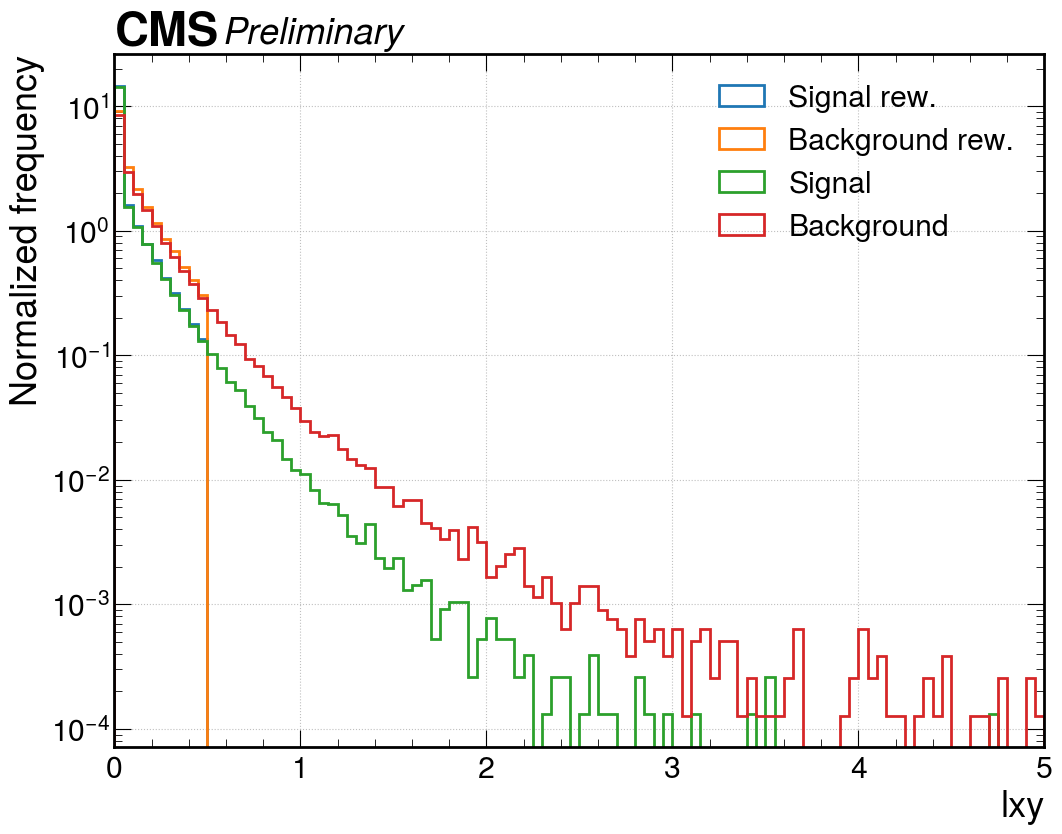

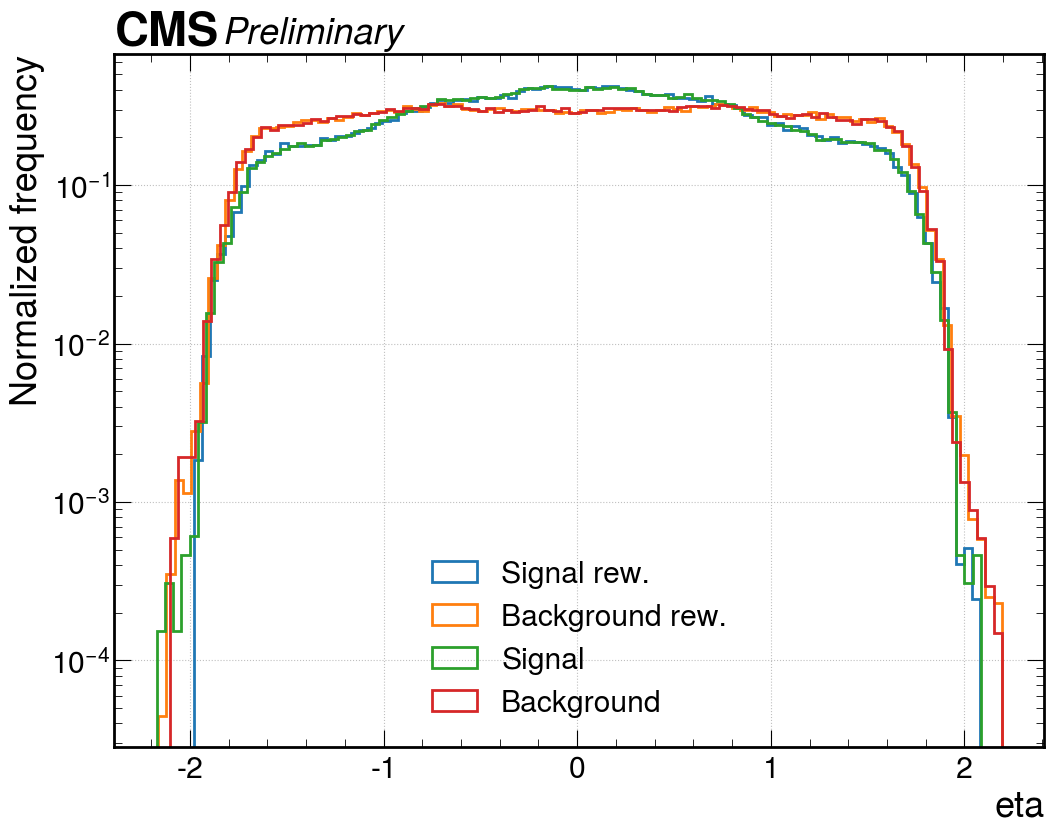

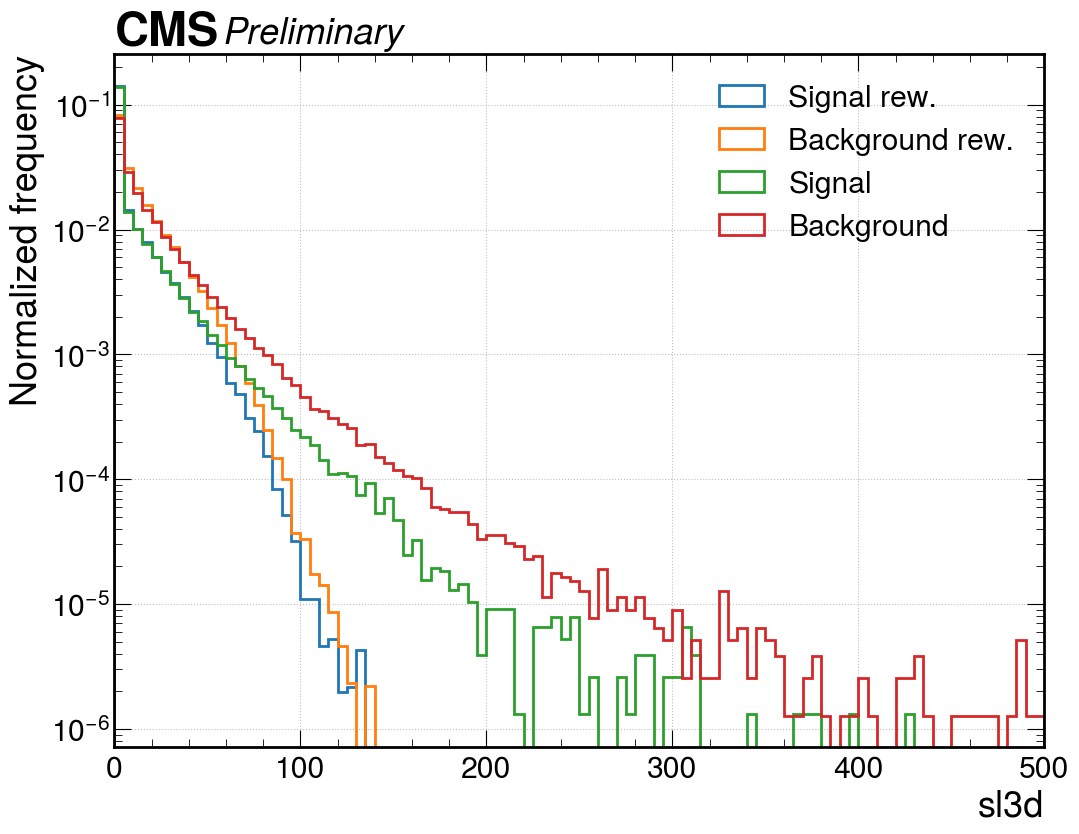

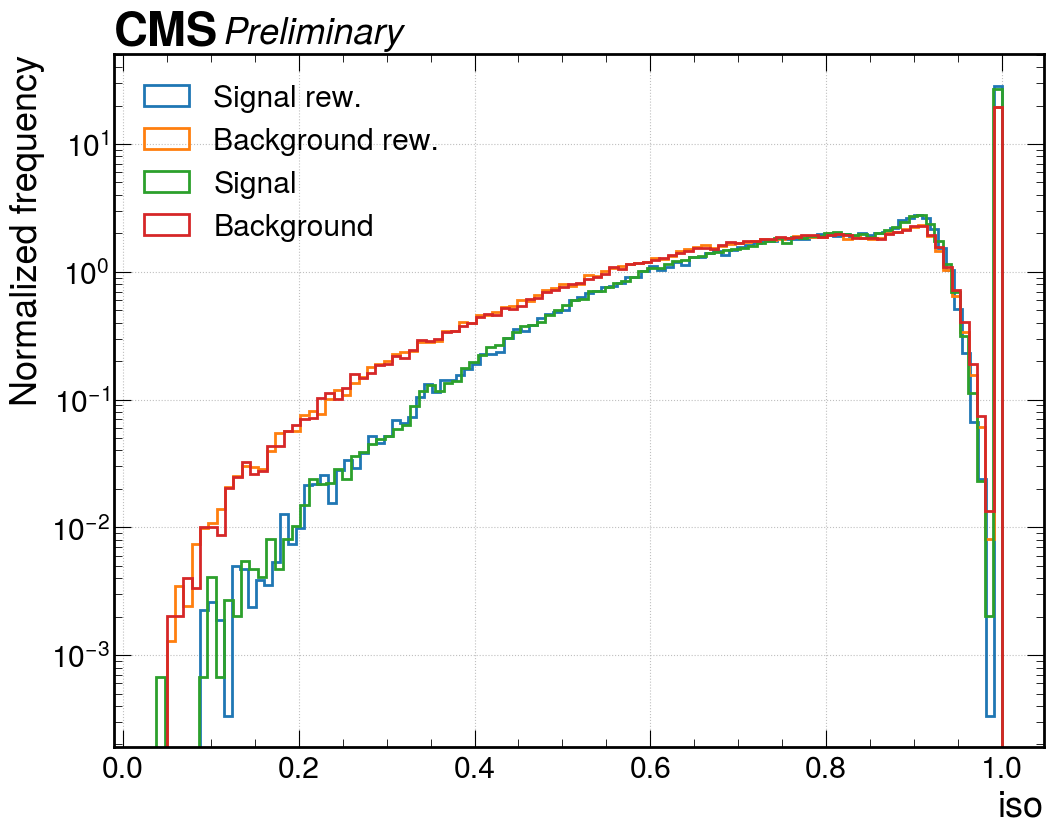

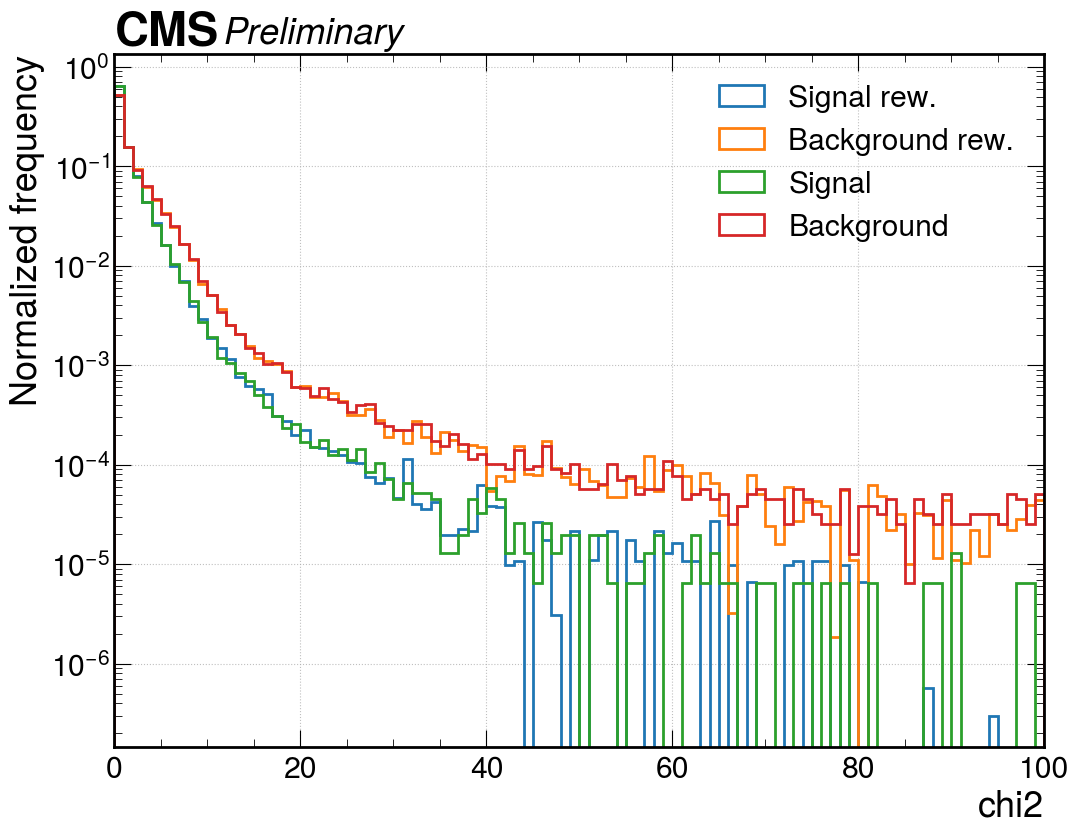

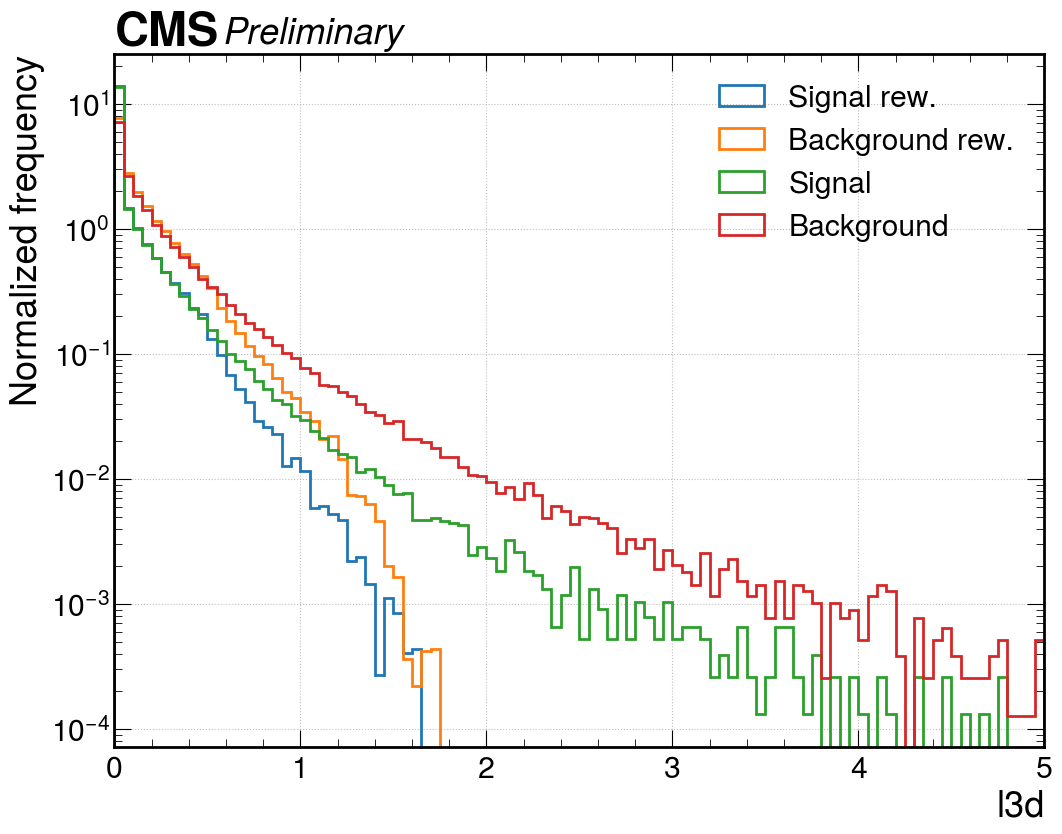

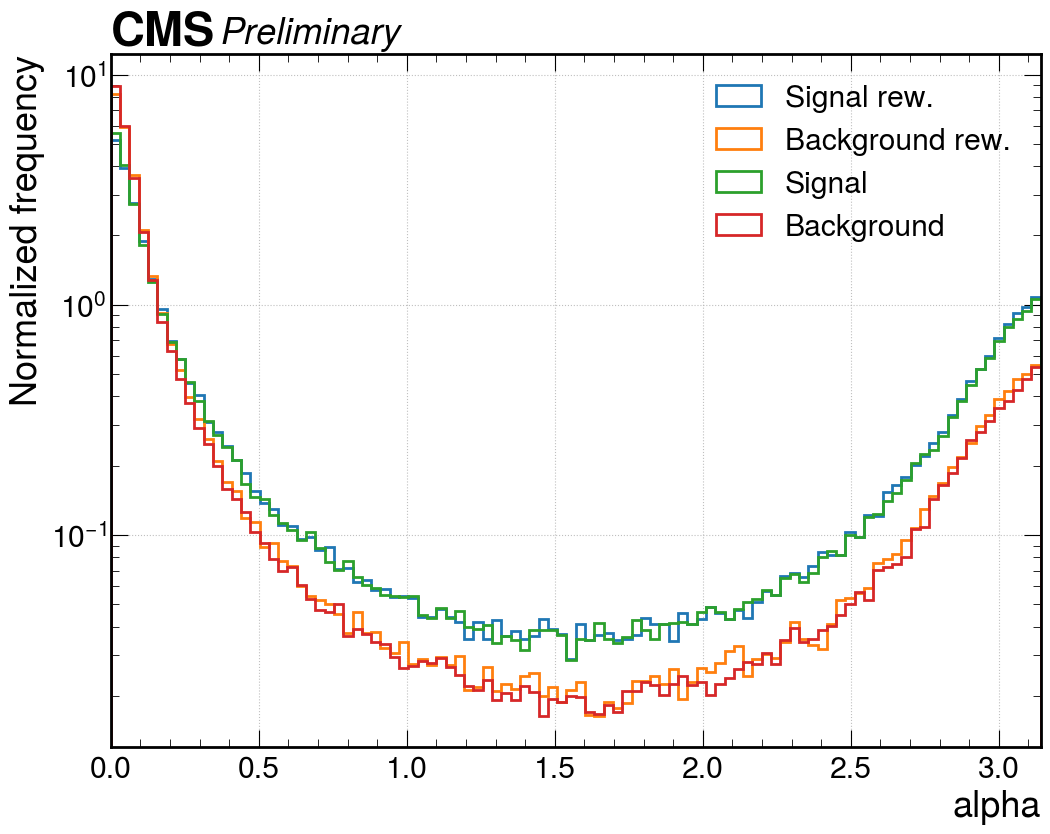

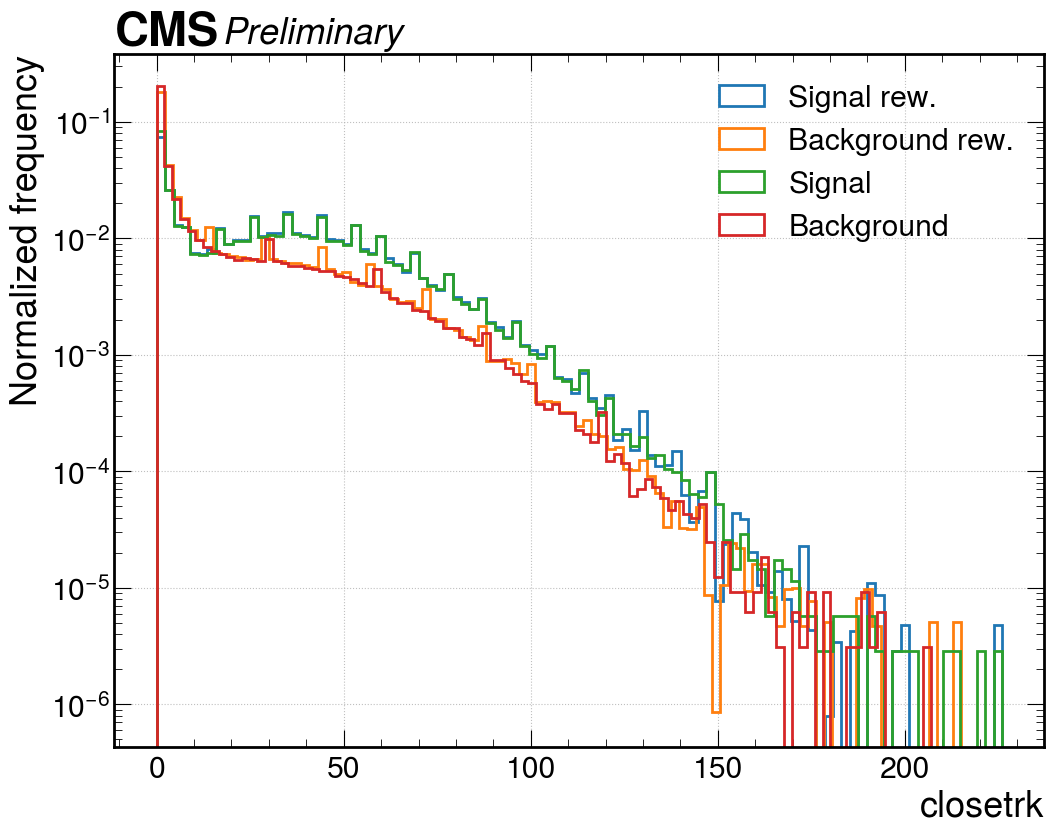

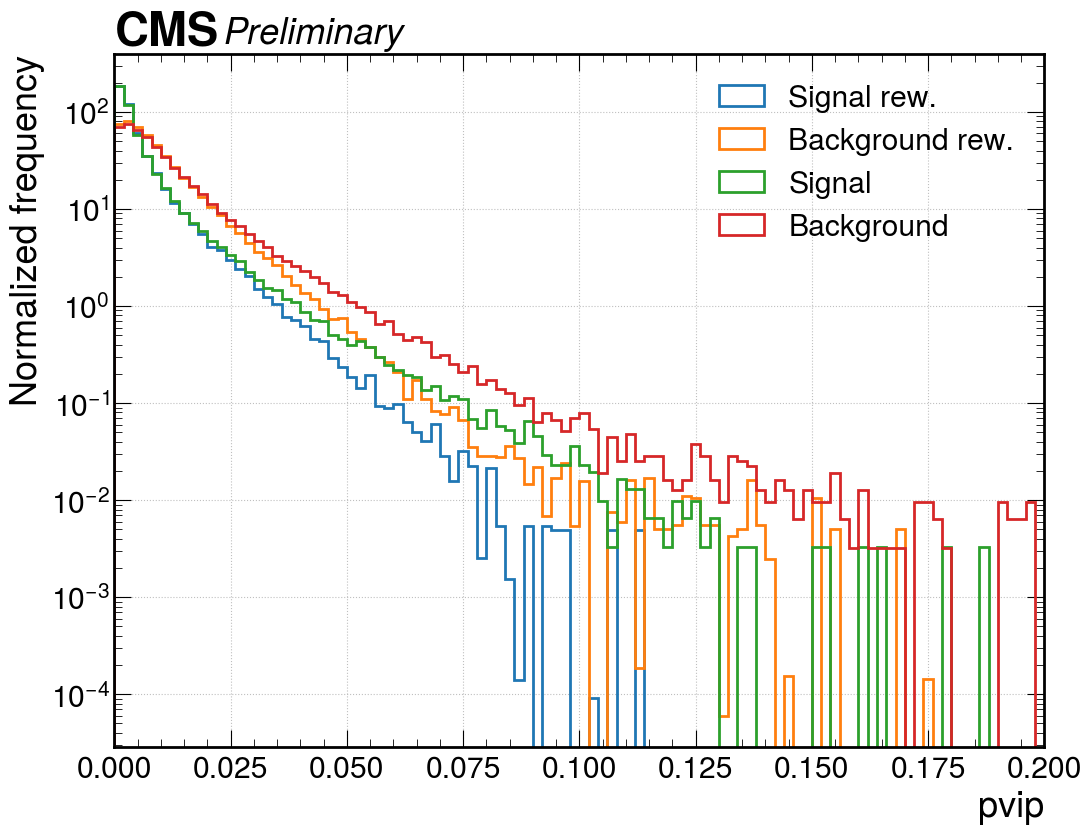

In [ ]:
Jpsi_fp.plot_hist([Jpsi_fp.X_val["Mm_kin_lxy"][Jpsi_fp.y_val==1],
                       Jpsi_fp.X_val["Mm_kin_lxy"][Jpsi_fp.y_val==0],
                       Jpsi_fs.X_val["Mm_kin_lxy"][Jpsi_fs.y_val==1],
                       Jpsi_fs.X_val["Mm_kin_lxy"][Jpsi_fs.y_val==0]],
                    ["Signal rew.","Background rew.","Signal","Background"], 
                    weights=[weights_fp[Jpsi_fp.X_val.index][Jpsi_fp.y_val==1],weights_fp[Jpsi_fp.X_val.index][Jpsi_fp.y_val==0],None,None], xlim=(0,5), xlabel = "lxy", log=True,density=True)
Jpsi_fp.plot_hist([Jpsi_fp.X_val["Mm_kin_eta"][Jpsi_fp.y_val==1],
                       Jpsi_fp.X_val["Mm_kin_eta"][Jpsi_fp.y_val==0],
                       Jpsi_fs.X_val["Mm_kin_eta"][Jpsi_fs.y_val==1],
                       Jpsi_fs.X_val["Mm_kin_eta"][Jpsi_fs.y_val==0]], 
                    ["Signal rew.","Background rew.","Signal","Background"], 
                    weights=[weights_fp[Jpsi_fp.X_val.index][Jpsi_fp.y_val==1],weights_fp[Jpsi_fp.X_val.index][Jpsi_fp.y_val==0],None,None],  xlabel="eta", log=True,density=True)
Jpsi_fp.plot_hist([Jpsi_fp.X_val["Mm_kin_sl3d"][Jpsi_fp.y_val==1],
                       Jpsi_fp.X_val["Mm_kin_sl3d"][Jpsi_fp.y_val==0],
                       Jpsi_fs.X_val["Mm_kin_sl3d"][Jpsi_fs.y_val==1],
                       Jpsi_fs.X_val["Mm_kin_sl3d"][Jpsi_fs.y_val==0]], 
                    ["Signal rew.","Background rew.","Signal","Background"], 
                    weights=[weights_fp[Jpsi_fp.X_val.index][Jpsi_fp.y_val==1],weights_fp[Jpsi_fp.X_val.index][Jpsi_fp.y_val==0],None,None],  xlim=(0,500), xlabel = 'sl3d', log=True,density=True)
Jpsi_fp.plot_hist([Jpsi_fp.X_val["Mm_iso"][Jpsi_fp.y_val==1],
                       Jpsi_fp.X_val["Mm_iso"][Jpsi_fp.y_val==0],
                       Jpsi_fs.X_val["Mm_iso"][Jpsi_fs.y_val==1],
                       Jpsi_fs.X_val["Mm_iso"][Jpsi_fs.y_val==0]], 
                    ["Signal rew.","Background rew.","Signal","Background"], 
                    weights=[weights_fp[Jpsi_fp.X_val.index][Jpsi_fp.y_val==1],weights_fp[Jpsi_fp.X_val.index][Jpsi_fp.y_val==0],None,None], xlabel = 'iso', log=True,density=True)
Jpsi_fp.plot_hist([Jpsi_fp.X_val["Mm_kin_vtx_chi2dof"][Jpsi_fp.y_val==1],
                       Jpsi_fp.X_val["Mm_kin_vtx_chi2dof"][Jpsi_fp.y_val==0],
                       Jpsi_fs.X_val["Mm_kin_vtx_chi2dof"][Jpsi_fs.y_val==1],
                       Jpsi_fs.X_val["Mm_kin_vtx_chi2dof"][Jpsi_fs.y_val==0]], 
                    ["Signal rew.","Background rew.","Signal","Background"], 
                    weights=[weights_fp[Jpsi_fp.X_val.index][Jpsi_fp.y_val==1],weights_fp[Jpsi_fp.X_val.index][Jpsi_fp.y_val==0],None,None],  xlabel = 'chi2', xlim = (0,100), log=True,density=True)
Jpsi_fp.plot_hist([Jpsi_fp.X_val["Mm_kin_l3d"][Jpsi_fp.y_val==1],
                       Jpsi_fp.X_val["Mm_kin_l3d"][Jpsi_fp.y_val==0],
                       Jpsi_fs.X_val["Mm_kin_l3d"][Jpsi_fs.y_val==1],
                       Jpsi_fs.X_val["Mm_kin_l3d"][Jpsi_fs.y_val==0]], 
                    ["Signal rew.","Background rew.","Signal","Background"], 
                    weights=[weights_fp[Jpsi_fp.X_val.index][Jpsi_fp.y_val==1],weights_fp[Jpsi_fp.X_val.index][Jpsi_fp.y_val==0],None,None], xlabel='l3d', xlim=(0,5), log=True,density=True)
Jpsi_fp.plot_hist([Jpsi_fp.X_val["Mm_kin_alpha"][Jpsi_fp.y_val==1],
                       Jpsi_fp.X_val["Mm_kin_alpha"][Jpsi_fp.y_val==0],
                       Jpsi_fs.X_val["Mm_kin_alpha"][Jpsi_fs.y_val==1],
                       Jpsi_fs.X_val["Mm_kin_alpha"][Jpsi_fs.y_val==0]], 
                    ["Signal rew.","Background rew.","Signal","Background"], 
                    weights=[weights_fp[Jpsi_fp.X_val.index][Jpsi_fp.y_val==1],weights_fp[Jpsi_fp.X_val.index][Jpsi_fp.y_val==0],None,None],  xlabel='alpha',xlim=(0,3.142), log=True,density=True)
Jpsi_fp.plot_hist([Jpsi_fp.X_val["Mm_closetrk"][Jpsi_fp.y_val==1],
                       Jpsi_fp.X_val["Mm_closetrk"][Jpsi_fp.y_val==0],
                       Jpsi_fs.X_val["Mm_closetrk"][Jpsi_fs.y_val==1],
                       Jpsi_fs.X_val["Mm_closetrk"][Jpsi_fs.y_val==0]], 
                    ["Signal rew.","Background rew.","Signal","Background"], 
                    weights=[weights_fp[Jpsi_fp.X_val.index][Jpsi_fp.y_val==1],weights_fp[Jpsi_fp.X_val.index][Jpsi_fp.y_val==0],None,None], xlabel='closetrk', log=True,density=True)
Jpsi_fp.plot_hist([Jpsi_fp.X_val["Mm_kin_pvip"][Jpsi_fp.y_val==1],
                       Jpsi_fp.X_val["Mm_kin_pvip"][Jpsi_fp.y_val==0],
                       Jpsi_fs.X_val["Mm_kin_pvip"][Jpsi_fs.y_val==1],
                       Jpsi_fs.X_val["Mm_kin_pvip"][Jpsi_fs.y_val==0]], 
                    ["Signal rew.","Background rew.","Signal","Background"], 
                    weights=[weights_fp[Jpsi_fp.X_val.index][Jpsi_fp.y_val==1],weights_fp[Jpsi_fp.X_val.index][Jpsi_fp.y_val==0],None,None], xlabel='pvip', xlim=(0,0.2), log=True,density=True)

Now look for optimal discriminators

In [ ]:
predY = Y_forest.bst.predict(xgb.DMatrix(Y_forest.trainData_skinny))
predJpsi = Y_forest.bst.predict(xgb.DMatrix(Y_forest_on_Jpsi_corr.trainData_skinny))

In [ ]:
#Study cuts on discriminators to optimize for Y

id1Y=Y_tree.trainData["Muon_softMva1"]
id2Y=Y_tree.trainData["Muon_softMva2"]
sig_cut = Y_tree.trainData["Score"]==1
bkg_cut = Y_tree.trainData["Score"]==0

def efficiencyY(id_lim,dis_lim):
    sig = (predY[sig_cut] > dis_lim) & (id1Y[sig_cut] > id_lim) & (id2Y[sig_cut] > id_lim)
    s = np.sum(sig)
    bkg = (predY[bkg_cut] > dis_lim) & (id1Y[bkg_cut] > id_lim) & (id2Y[bkg_cut] > id_lim)
    b = np.sum(bkg)
    return s/np.sqrt(b) if b!= 0 else 0



In [ ]:
id_vals = np.linspace(0.2,0.5,50)
vtx_vals= np.linspace(0.45,0.9,50)
XY, YY = np.meshgrid(id_vals,vtx_vals)
effY = np.vectorize(efficiencyY)(XY,YY)
idxY = np.unravel_index(np.argmax(effY),effY.shape)
print("Optimal discriminator cuts: \n SoftMVA (Muon ID): ", XY[idxY], "\n BDT (Vertex quantities): ", YY[idxY])

Optimal discriminator cuts: 
 SoftMVA (Muon ID):  0.43265306122448977 
 BDT (Vertex quantities):  0.7346938775510204


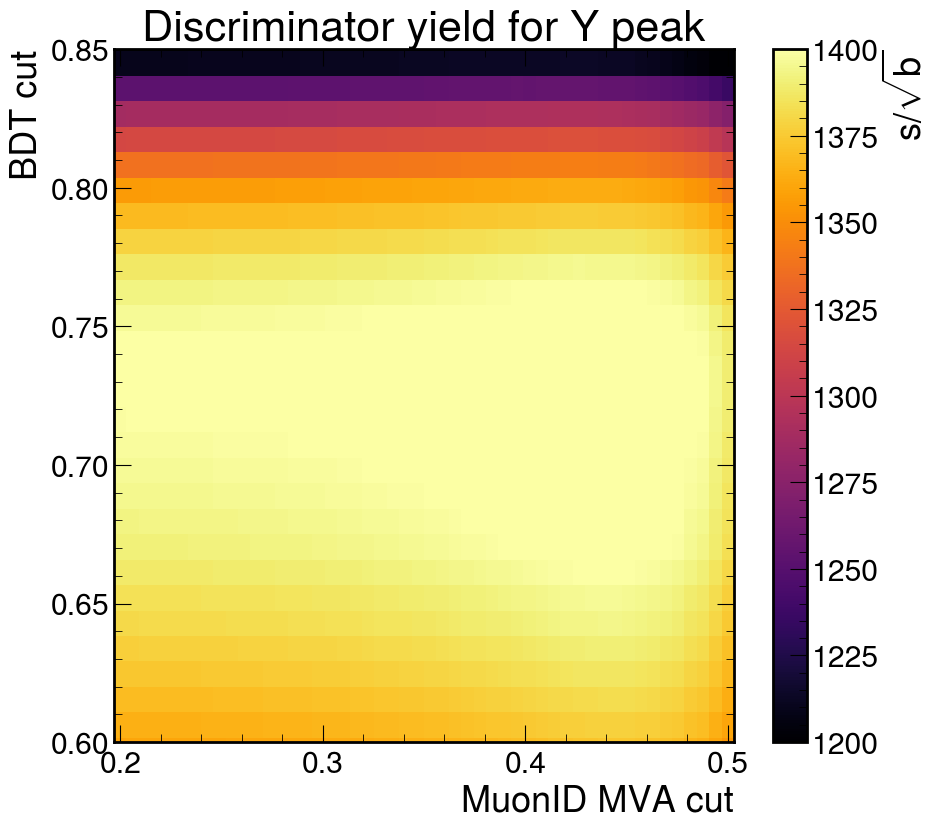

In [ ]:
plt.figure(figsize=(10, 9))
pcm = plt.pcolormesh(XY, YY, effY, shading='auto', cmap='inferno',vmin=1200,vmax=1400)# norm=matplotlib.colors.LogNorm()
colorbar = plt.colorbar(pcm, label='$s/\sqrt{b}$')
# colorbar_ticks = [1000,1300 , 2000]  # Define your desired tick positions
# colorbar.set_ticks(colorbar_ticks)
plt.xlabel('MuonID MVA cut')
plt.ylabel('BDT cut')
plt.title('Discriminator yield for Y peak')
plt.ylim(0.6,0.85)
plt.show()

In [ ]:
id1Jpsi=Y_forest_on_Jpsi_corr.trainData["Muon_softMva1"]
id2Jpsi=Y_forest_on_Jpsi_corr.trainData["Muon_softMva2"]
sig_cut = Y_forest_on_Jpsi_corr.trainData["Score"]==1
bkg_cut = Y_forest_on_Jpsi_corr.trainData["Score"]==0

def efficiencyJpsi(id_lim,dis_lim):
    sig = (predJpsi[sig_cut] > dis_lim) & (id1Jpsi[sig_cut] > id_lim) & (id2Jpsi[sig_cut] > id_lim)
    s = np.sum(Y_forest_on_Jpsi_corr.trainData["weights_prompt"][sig_cut][sig])
    bkg = (predJpsi[bkg_cut] > dis_lim) & (id1Jpsi[bkg_cut] > id_lim) & (id2Jpsi[bkg_cut] > id_lim)
    b = np.sum(bkg)
    return s/np.sqrt(b) if b!= 0 else 0
# print(Y_forest_on_Jpsi_corr.trainData["weights_prompt"][sig_cut])
# print(efficiencyJpsi(-2,-1))

In [ ]:
id_vals = np.linspace(0.2,0.5,50)
vtx_vals= np.linspace(0.2,0.8,50)
XY, YY = np.meshgrid(id_vals,vtx_vals)
effJpsi = np.vectorize(efficiencyJpsi)(XY,YY)
idxJpsi = np.unravel_index(np.argmax(effJpsi),effJpsi.shape)
print("Optimal discriminator cuts on Jpsi: \n SoftMVA (Muon ID): ", XY[idxJpsi], "\n BDT (Vertex quantities): ", YY[idxJpsi])

KeyError: 'weights_prompt'

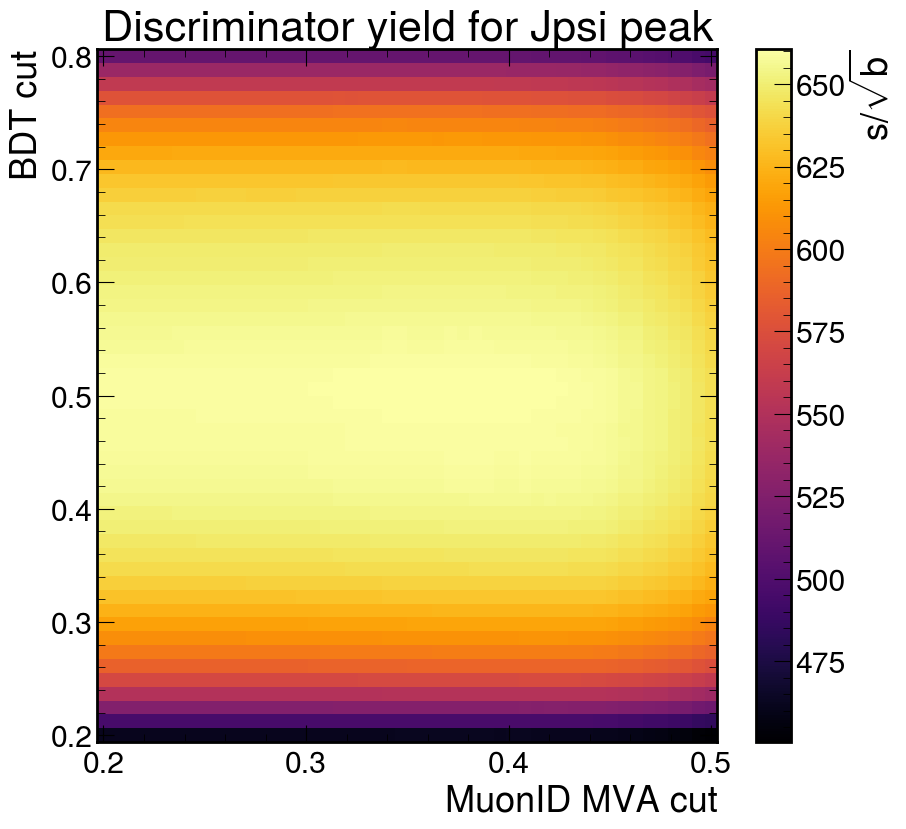

In [ ]:
plt.figure(figsize=(10, 9))
pcm = plt.pcolormesh(XY, YY, effJpsi, shading='auto', cmap='inferno')# norm=matplotlib.colors.LogNorm()
colorbar = plt.colorbar(pcm, label='$s/\sqrt{b}$')
# colorbar_ticks = [1000,1300 , 2000]  # Define your desired tick positions
# colorbar.set_ticks(colorbar_ticks)
plt.xlabel('MuonID MVA cut')
plt.ylabel('BDT cut')
plt.title('Discriminator yield for Jpsi peak')
# plt.ylim(0.6,0.85)
plt.show()

Here study working point of Jpsi trained forest

In [ ]:
predY = Jpsi_forest_on_Y_prompt.bst.predict(xgb.DMatrix(Jpsi_forest_on_Y_prompt.trainData_skinny))
predJpsi = Jpsi_fp.bst.predict(xgb.DMatrix(Jpsi_fp.trainData_skinny))

In [ ]:
#Study cuts on discriminators to optimize for Y

id1Y=Jpsi_forest_on_Y_prompt.trainData["Muon_softMva1"]
id2Y=Jpsi_forest_on_Y_prompt.trainData["Muon_softMva2"]
sig_cut = Jpsi_forest_on_Y_prompt.trainData["Score"]==1
bkg_cut = Jpsi_forest_on_Y_prompt.trainData["Score"]==0

def efficiencyY(id_lim,dis_lim):
    sig = (predY[sig_cut] > dis_lim) & (id1Y[sig_cut] > id_lim) & (id2Y[sig_cut] > id_lim)
    s = np.sum(sig)
    bkg = (predY[bkg_cut] > dis_lim) & (id1Y[bkg_cut] > id_lim) & (id2Y[bkg_cut] > id_lim)
    b = np.sum(bkg)
    return s/np.sqrt(b) if b!= 0 else 0

In [ ]:
id_vals = np.linspace(0.2,0.5,50)
vtx_vals= np.linspace(0.9,0.99,100)
XY, YY = np.meshgrid(id_vals,vtx_vals)
effY = np.vectorize(efficiencyY)(XY,YY)
idxY = np.unravel_index(np.argmax(effY),effY.shape)
print("Optimal discriminator cuts: \n SoftMVA (Muon ID): ", XY[idxY], "\n BDT (Vertex quantities): ", YY[idxY])

Optimal discriminator cuts: 
 SoftMVA (Muon ID):  0.45102040816326533 
 BDT (Vertex quantities):  0.9609090909090909
signal efficiency: 


In [ ]:
id_lim = 0.45
dis_lim = 0.94
sig = (predY[sig_cut] > dis_lim)
e = np.sum(sig)/len(sig)
print(e)

0.7793074773430162


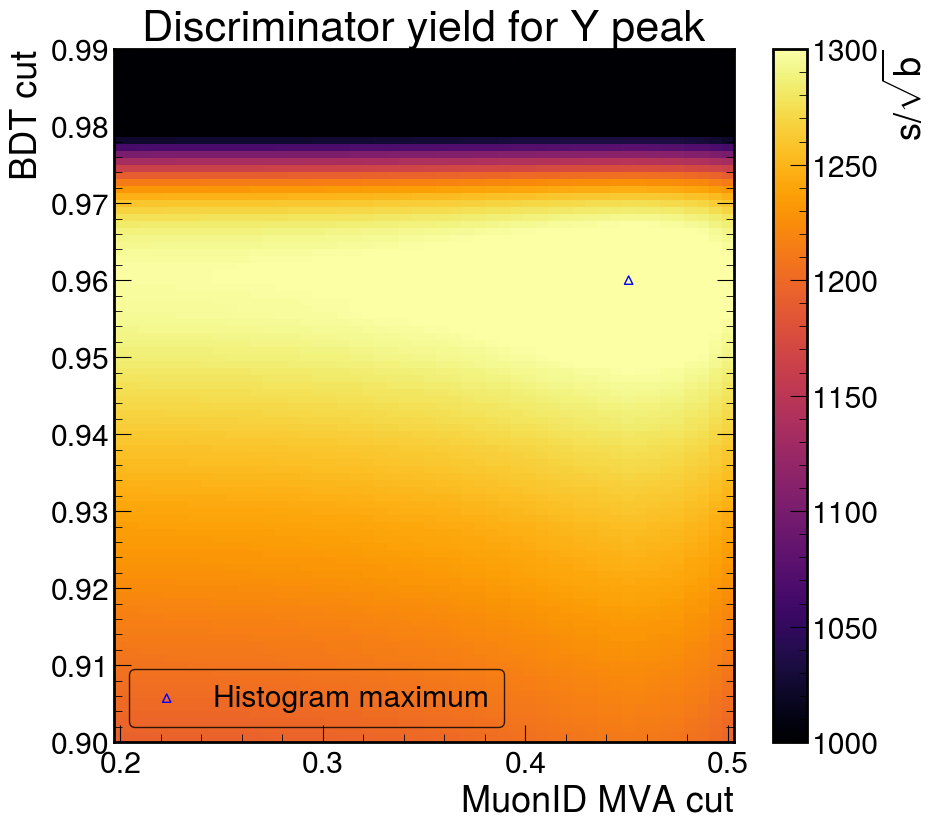

In [ ]:
plt.figure(figsize=(10, 9))
pcm = plt.pcolormesh(XY, YY, effY, shading='auto', cmap='inferno',vmin=1000,vmax=1300)# norm=matplotlib.colors.LogNorm()
plt.scatter( XY[idxY], YY[idxY],marker = '^', edgecolors='blue', facecolors='none', label="Histogram maximum")
plt.legend(loc='lower left',    frameon=True, edgecolor='black', facecolor='none',)
colorbar = plt.colorbar(pcm, label='$s/\sqrt{b}$')
# colorbar_ticks = [1000,1300 , 2000]  # Define your desired tick positions
# colorbar.set_ticks(colorbar_ticks)
plt.xlabel('MuonID MVA cut')
plt.ylabel('BDT cut')
plt.title('Discriminator yield for Y peak')
plt.ylim(0.9,0.99)
plt.show()

In [ ]:
id1Jpsi=Jpsi_fp.trainData["Muon_softMva1"]
id2Jpsi=Jpsi_fp.trainData["Muon_softMva2"]
sig_cut = Jpsi_fp.trainData["Score"]==1
bkg_cut = Jpsi_fp.trainData["Score"]==0

def efficiencyJpsi(id_lim,dis_lim):
    sig = (predJpsi[sig_cut] > dis_lim) & (id1Jpsi[sig_cut] > id_lim) & (id2Jpsi[sig_cut] > id_lim)
    s = np.sum(Jpsi_fp.trainData["weights_prompt"][sig_cut][sig])
    bkg = (predJpsi[bkg_cut] > dis_lim) & (id1Jpsi[bkg_cut] > id_lim) & (id2Jpsi[bkg_cut] > id_lim)
    b = np.sum(bkg)
    return s/np.sqrt(b) if b!= 0 else 0


In [ ]:
id_vals = np.linspace(0.2,0.5,50)
vtx_vals= np.linspace(0.9,0.99,100)
XY, YY = np.meshgrid(id_vals,vtx_vals)
effY = np.vectorize(efficiencyJpsi)(XY,YY)
idxY = np.unravel_index(np.argmax(effY),effY.shape)
print("Optimal discriminator cuts: \n SoftMVA (Muon ID): ", XY[idxY], "\n BDT (Vertex quantities): ", YY[idxY])

Optimal discriminator cuts: 
 SoftMVA (Muon ID):  0.3836734693877551 
 BDT (Vertex quantities):  0.9445454545454546


In [ ]:
id_lim = 0.45
dis_lim = 0.94
sig = (predJpsi[sig_cut] > dis_lim) & (id1Jpsi[sig_cut] > id_lim) & (id2Jpsi[sig_cut] > id_lim)
e = np.sum(sig)/len(sig)
print(e)

0.47468038233736215


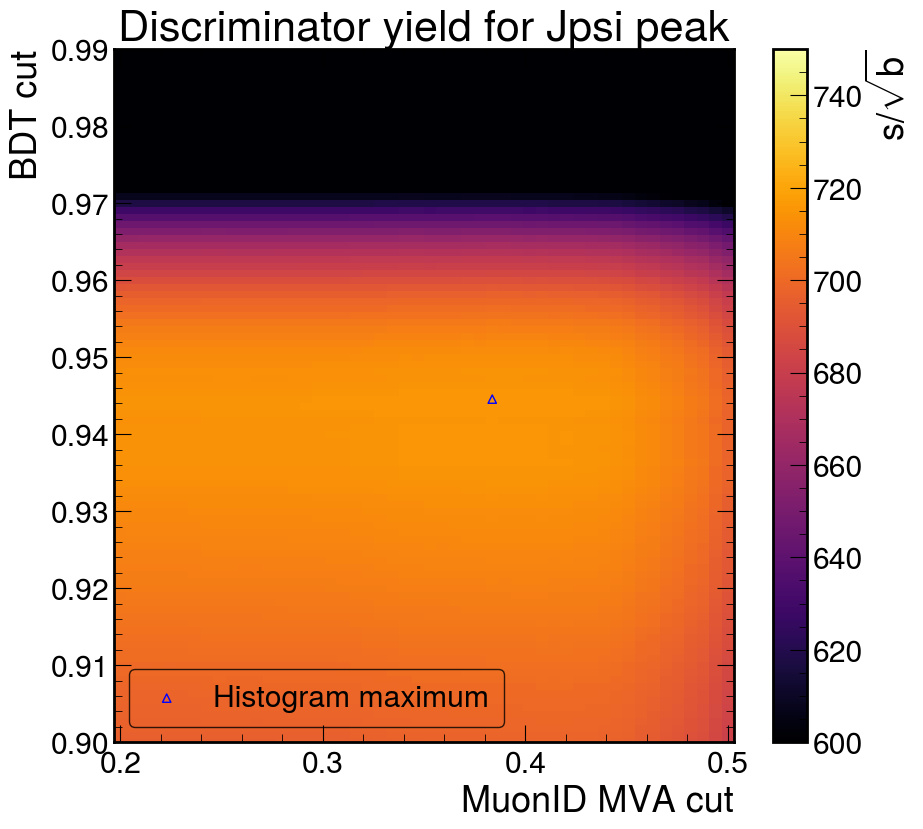

In [ ]:
plt.figure(figsize=(10, 9))
pcm = plt.pcolormesh(XY, YY, effY, shading='auto', cmap='inferno',vmin=600,vmax=750)# norm=matplotlib.colors.LogNorm()
plt.scatter( XY[idxY], YY[idxY],marker = '^', edgecolors='blue', facecolors='none', label="Histogram maximum")
plt.legend(loc='lower left',    frameon=True, edgecolor='black', facecolor='none',)
colorbar = plt.colorbar(pcm, label='$s/\sqrt{b}$')
# colorbar_ticks = [1000,1300 , 2000]  # Define your desired tick positions
# colorbar.set_ticks(colorbar_ticks)
plt.xlabel('MuonID MVA cut')
plt.ylabel('BDT cut')
plt.title('Discriminator yield for Jpsi peak')
plt.ylim(0.9,0.99)
plt.show()